In [146]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer


In [52]:
search_df = pd.read_csv('Search Query Mining Report.csv',skiprows=2,low_memory=False)

In [132]:
search_df

,Account name,Customer ID,Search term,Currency code,Search keyword,Keyword ID,Campaign ID,Clicks,Impr.,CTR,...,Impr. (Abs. Top) %,Impr. (Top) %,Conversions,View-through conv.,Cost / conv.,Conv. value,Conv. value / cost,Conv. rate,LV_distance,Conversions_R
0,HealthCare.com U65,476-322-7661,private health insurance america,USD,Affordable Health Insurance,307780384298,11118025655,0,1,0.00%,...,0.00%,100.00%,0.00,0,--,0.00,--,0,18,0.0
1,HealthCare.com U65,476-322-7661,open enrollment obamacare 2021,USD,Affordable Health Insurance,307780384298,11118025655,0,2,0.00%,...,0,0,0.00,0,--,0.00,--,0,28,0.0
2,HealthCare.com U65,476-322-7661,free insurance stimulus,USD,Affordable Health Insurance,307780384298,11118025655,0,1,0.00%,...,0.00%,100.00%,0.00,0,--,0.00,--,0,23,0.0
3,HealthCare.com U65,476-322-7661,insurance for unemployed adults,USD,Affordable Health Insurance,307780384298,11118025655,0,6,0.00%,...,40.00%,80.00%,0.00,0,--,0.00,--,0,27,0.0
4,HealthCare.com U65,476-322-7661,retirement health care,USD,Affordable Health Insurance,307780384298,11118025655,1,7,14.29%,...,42.86%,100.00%,0.00,0,--,0.00,0.00,0.00%,17,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13446991,HealthCare.com U65,476-322-7661,dental racine wi,USD,dental,34830920,12912639787,0,1,0.00%,...,0.00%,100.00%,0.00,0,--,0.00,--,0,10,0.0
13446992,HealthCare.com U65,476-322-7661,affordable care act insurance arizona,USD,aca arizona,331134963283,15309976759,0,1,0.00%,...,100.00%,100.00%,0.00,0,--,0.00,--,0,26,0.0
13446993,HealthCare.com U65,476-322-7661,www molina,USD,www molina com,300131271960,12913278236,0,1,0.00%,...,0.00%,100.00%,0.00,0,--,0.00,--,0,4,0.0
13446994,HealthCare.com O65,120-348-7028,medicare part d illinois,USD,part d,299070005996,14492040211,0,1,0.00%,...,0.00%,100.00%,0.00,0,--,0.00,--,0,18,0.0


In [54]:
search_df[['Search term','Search keyword','Cost','Conversions','Keyword ID']].sort_values(by='Conversions', ascending=False)

,Search term,Search keyword,Cost,Conversions,Keyword ID
10343872,molina healthcare ohio,molina healthcare ohio,1964.94,99.83,323353038381
12527890,tenncare phone number,tenncare phone number,1075.16,99.66,345090298692
2769062,medicaid arkansas,medicaid,1237.53,99.50,112048292
9131754,aca,aca,575.62,99.50,48077212
438410,ambetter customer service number,ambetter health care,1628.78,99.42,297109642943
...,...,...,...,...,...
4535165,florida oscar insurance,oscar florida,2.50,0.00,909673584705
4535166,how do i get my delta dental insurance informa...,delta dental coverage,0.00,0.00,324587823
4535167,how much does cobra cost in ct,cobra care insurance,0.00,0.00,488195961749
4535168,medicare original plans 2021,medicare 2021,0.00,0.00,941220845669


In [55]:
search_df[['Search term','Search keyword','Cost','Conversions','Keyword ID','Conv. value']].sort_values(by='Conv. value', ascending=False).head(25)

,Search term,Search keyword,Cost,Conversions,Keyword ID,Conv. value
12290021,www benefeds com vision and dental plan,dental plans,64.75,3.00,20943531,999.87
10704605,how to enroll in medicare,how to enroll in medicare,1224.72,66.00,10448337002,999.53
1797461,same day health insurance,instant health insurance,101.19,1.00,449698807,999.19
11754745,ehealth medicare publix code,health insurance medicare,22.10,4.00,536068459,998.61
10463742,ambetter customer service number,ambetter 1800 number,867.96,54.83,611511202712,998.36
9760708,kaiser in texas,kaiser permanente texas,16.91,4.00,20021360,998.08
6389547,mo healthnet,mo health,1008.24,56.00,357657129006,997.74
10145454,www socialsecurity gov,www social security gov,1110.32,34.84,157952571,997.12
3242633,anthem insurance com,anthem hmo,8.62,3.00,283622872,997.00
4598326,cobra,cobra,5204.06,4.00,14003660,996.77


In [56]:
# !pip install python-Levenshtein


In [57]:
import Levenshtein as Lv

In [58]:
search_df['Search term']

0                private health insurance america
1                  open enrollment obamacare 2021
2                         free insurance stimulus
3                 insurance for unemployed adults
4                          retirement health care
                            ...                  
13446991                         dental racine wi
13446992    affordable care act insurance arizona
13446993                               www molina
13446994                 medicare part d illinois
13446995                         center st dental
Name: Search term, Length: 13446996, dtype: object

In [59]:
# Lv.distance(search_df['Search term'],search_df['Search keyword'])

In [60]:
search_df['LV_distance'] = search_df.apply(lambda x: Lv.distance(x['Search term'],  x['Search keyword']), axis=1)

In [61]:
search_df[['Search term','Search keyword','Cost','Conversions','Keyword ID','Conv. value','LV_distance']].sort_values(by='Conv. value', ascending=False).head(25)

,Search term,Search keyword,Cost,Conversions,Keyword ID,Conv. value,LV_distance
12290021,www benefeds com vision and dental plan,dental plans,64.75,3.00,20943531,999.87,29
10704605,how to enroll in medicare,how to enroll in medicare,1224.72,66.00,10448337002,999.53,0
1797461,same day health insurance,instant health insurance,101.19,1.00,449698807,999.19,8
11754745,ehealth medicare publix code,health insurance medicare,22.10,4.00,536068459,998.61,16
10463742,ambetter customer service number,ambetter 1800 number,867.96,54.83,611511202712,998.36,16
9760708,kaiser in texas,kaiser permanente texas,16.91,4.00,20021360,998.08,9
6389547,mo healthnet,mo health,1008.24,56.00,357657129006,997.74,3
10145454,www socialsecurity gov,www social security gov,1110.32,34.84,157952571,997.12,1
3242633,anthem insurance com,anthem hmo,8.62,3.00,283622872,997.00,12
4598326,cobra,cobra,5204.06,4.00,14003660,996.77,0


In [62]:
search_df[['Search term','Search keyword','Cost','Conversions','Keyword ID','Conv. value','LV_distance']].sort_values(by='LV_distance', ascending=False).head(25)

,Search term,Search keyword,Cost,Conversions,Keyword ID,Conv. value,LV_distance
7978792,discuss the changing landscape of the us healt...,aca,0.0,0.00,100032174,0.00,125
13031372,why are the premiums for a ppo health insuranc...,ppo,0.0,0.00,128929739,0.00,125
11569777,should congress have passed the affordable car...,aca,0.0,0.00,100032174,0.00,125
3246305,in the aca there are three categories of state...,aca,0.0,0.00,100032174,0.00,125
10742673,under the patient protection and affordable ca...,aca,0.0,0.00,100032174,0.00,125
3963011,if casey's insurance was an hmo capitation pla...,hmo,0.0,0.00,17180442,0.00,125
8423158,in what way can it be said that the expansion ...,aca,0.0,0.00,100032174,0.00,125
12184326,the patient protection and affordable care act...,aca,0.0,0.00,100032174,0.00,125
12540424,member doug enrolled in a health maintenance o...,hmo,0.0,0.00,17180442,0.00,125
13252826,according to the aca annual and lifetime benef...,aca,0.0,0.00,100032174,0.00,125


In [63]:
search_df[['Conversions','LV_distance']].sort_values(by='LV_distance',ascending=False)

,Conversions,LV_distance
7978792,0.00,125
13031372,0.00,125
11569777,0.00,125
3246305,0.00,125
10742673,0.00,125
...,...,...
7148394,0.00,0
7148397,0.67,0
11572310,0.00,0
895529,0.00,0


In [70]:
# search_df[['Conversions','LV_distance']].sort_values(by='LV_distance',ascending=False).plot()

In [73]:
search_df.Conversions.max()

'99.83'

In [79]:
search_df.Conversions

0           0.00
1           0.00
2           0.00
3           0.00
4           0.00
            ... 
13446991    0.00
13446992    0.00
13446993    0.00
13446994    0.00
13446995    0.00
Name: Conversions, Length: 13446996, dtype: object

<AxesSubplot:xlabel='Conversions', ylabel='LV_distance'>

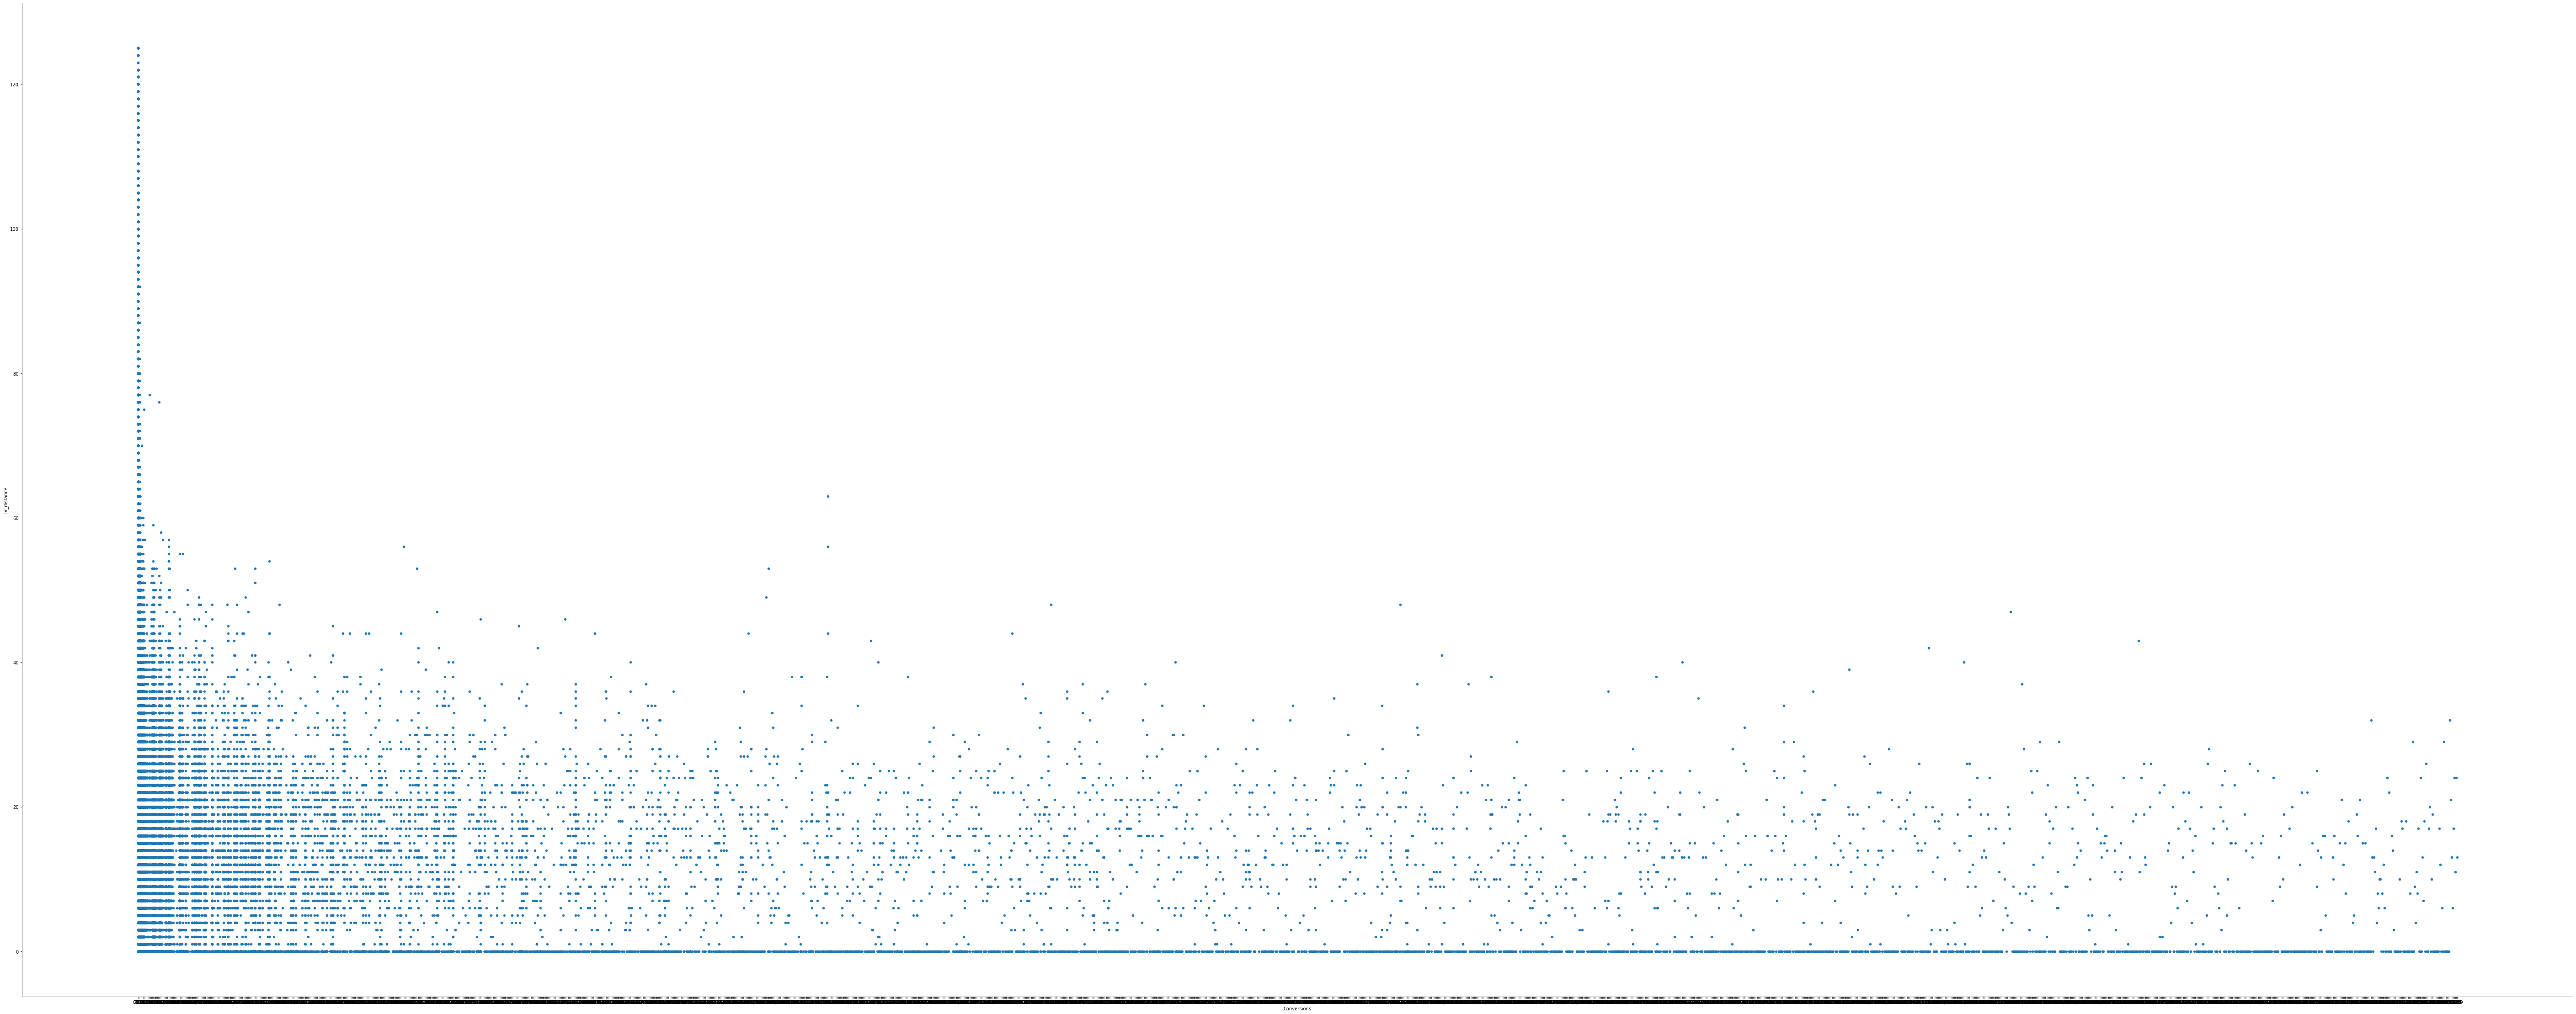

In [72]:
# search_df.plot.scatter(x='Conversions',y='LV_distance',colormap='viridis',figsize=(100,40))

In [69]:
# aug_edata.loc[aug_edata['ACTION'] == 'click']['Duration_to_action'].value_counts().sort_values().plot()


In [113]:
search_df['Conversions'].max()

'99.83'

In [119]:
search_df['Conversions_R'] = pd.to_numeric(search_df['Conversions'].str.replace(',',''))

In [131]:
# search_df.Con_round = search_df.Conversions.round()
# search_df['Conversions_R'] = search_df['Conversions'].astype(str).astype(float)
# .str.replace(',','')

In [109]:
# search_df['Conversions_R']  = search_df['Conversions_R'].astype(str).astype(float)

In [ ]:
# search_df.plot.scatter(x='Conversions',y='LV_distance',colormap='viridis',figsize=(100,40))

In [124]:
search_df[['Conversions','Conversions_R']].max()

Conversions         99.83
Conversions_R    10940.57
dtype: object

In [288]:
# search_df['Conversions_R']
test = search_df.loc[search_df['Conversions_R']<=100]

In [308]:
test

,Account name,Customer ID,Search term,Currency code,Search keyword,Keyword ID,Campaign ID,Clicks,Impr.,CTR,...,Cost / conv.,Conv. value,Conv. value / cost,Conv. rate,LV_distance,Conversions_R,Type,query_vec,keyword_vec,simscore
0,HealthCare.com U65,476-322-7661,private health insurance america,USD,Affordable Health Insurance,307780384298,11118025655,0,1,0.00%,...,--,0.00,--,0,18,0.0,2,"{'private': 1, 'health': 1, 'insurance': 1, 'a...","{'Affordable': 1, 'Health': 1, 'Insurance': 1}",0.000000
1,HealthCare.com U65,476-322-7661,open enrollment obamacare 2021,USD,Affordable Health Insurance,307780384298,11118025655,0,2,0.00%,...,--,0.00,--,0,28,0.0,1,"{'open': 1, 'enrollment': 1, 'obamacare': 1, '...","{'Affordable': 1, 'Health': 1, 'Insurance': 1}",0.000000
2,HealthCare.com U65,476-322-7661,free insurance stimulus,USD,Affordable Health Insurance,307780384298,11118025655,0,1,0.00%,...,--,0.00,--,0,23,0.0,2,"{'free': 1, 'insurance': 1, 'stimulus': 1}","{'Affordable': 1, 'Health': 1, 'Insurance': 1}",0.000000
3,HealthCare.com U65,476-322-7661,insurance for unemployed adults,USD,Affordable Health Insurance,307780384298,11118025655,0,6,0.00%,...,--,0.00,--,0,27,0.0,2,"{'insurance': 1, 'for': 1, 'unemployed': 1, 'a...","{'Affordable': 1, 'Health': 1, 'Insurance': 1}",0.000000
4,HealthCare.com U65,476-322-7661,retirement health care,USD,Affordable Health Insurance,307780384298,11118025655,1,7,14.29%,...,--,0.00,0.00,0.00%,17,0.0,1,"{'retirement': 1, 'health': 1, 'care': 1}","{'Affordable': 1, 'Health': 1, 'Insurance': 1}",0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13446991,HealthCare.com U65,476-322-7661,dental racine wi,USD,dental,34830920,12912639787,0,1,0.00%,...,--,0.00,--,0,10,0.0,1,"{'dental': 1, 'racine': 1, 'wi': 1}",{'dental': 1},0.577350
13446992,HealthCare.com U65,476-322-7661,affordable care act insurance arizona,USD,aca arizona,331134963283,15309976759,0,1,0.00%,...,--,0.00,--,0,26,0.0,2,"{'affordable': 1, 'care': 1, 'act': 1, 'insura...","{'aca': 1, 'arizona': 1}",0.316228
13446993,HealthCare.com U65,476-322-7661,www molina,USD,www molina com,300131271960,12913278236,0,1,0.00%,...,--,0.00,--,0,4,0.0,1,"{'www': 1, 'molina': 1}","{'www': 1, 'molina': 1, 'com': 1}",0.816497
13446994,HealthCare.com O65,120-348-7028,medicare part d illinois,USD,part d,299070005996,14492040211,0,1,0.00%,...,--,0.00,--,0,18,0.0,1,"{'medicare': 1, 'part': 1, 'd': 1, 'illinois': 1}","{'part': 1, 'd': 1}",0.707107


In [179]:
bleh = search_df.loc[search_df['Conversions_R']>=100]
bleh

,Account name,Customer ID,Search term,Currency code,Search keyword,Keyword ID,Campaign ID,Clicks,Impr.,CTR,...,Impr. (Top) %,Conversions,View-through conv.,Cost / conv.,Conv. value,Conv. value / cost,Conv. rate,LV_distance,Conversions_R,Type
41352,HealthCare.com U65,476-322-7661,farm bureau health insurance,USD,+farm +bureau +health,47491889147,11118025634,"1,146","5,961",19.22%,...,96.99%,340.12,0,8.58,"3,745.81",1.28,29.68%,14,340.12,2
55003,HealthCare.com U65,476-322-7661,penny insurance,USD,+insurance,292717698,11193529866,402,"4,057",9.91%,...,94.49%,163.00,0,11.31,"1,703.21",0.92,40.55%,6,163.00,2
98579,HealthCare.com U65,476-322-7661,marketplace,USD,marketplace,11351851,12407196204,"8,142","114,456",7.11%,...,98.71%,"1,881.12",0,12.67,"27,126.74",1.14,23.10%,0,1881.12,1
122199,HealthCare.com U65,476-322-7661,hip insurance,USD,+insurance,292717698,11193529866,524,"6,477",8.09%,...,92.38%,193.00,0,14.30,"3,224.87",1.17,36.83%,4,193.00,2
134968,HealthCare.com U65,476-322-7661,medicaid sc,USD,medicaid,112048292,13613581861,806,"17,904",4.50%,...,95.33%,201.00,0,16.87,"3,296.38",0.97,24.94%,3,201.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13339107,HealthCare.com U65,476-322-7661,cobra insurance texas,USD,cobra insurance texas,313504353,12912640711,562,"3,568",15.75%,...,89.47%,168.00,0,15.24,"4,277.36",1.67,29.89%,0,168.00,2
13367047,HealthCare.com U65,476-322-7661,healthcare marketplace texas,USD,healthcare marketplace texas,332877843284,12912640711,290,"1,691",17.15%,...,83.00%,119.00,0,11.95,"2,775.06",1.95,41.03%,0,119.00,1
13396459,HealthCare.com U65,476-322-7661,florida blue customer service,USD,florida blue phone number,70644410291,13061257335,699,"4,942",14.14%,...,93.51%,206.50,0,16.74,"5,563.00",1.61,29.54%,13,206.50,1
13404630,HealthCare.com O65,120-348-7028,medicare dental plans,USD,medicare dental,309881018,12670520607,780,"4,506",17.31%,...,75.04%,228.52,0,16.26,"5,170.18",1.39,29.30%,6,228.52,2


In [174]:
search_df['Conversions'].value_counts()

0.00     13128823
1.00       161175
2.00        80080
3.00        18489
4.00         9621
           ...   
14.75           1
13.51           1
76.24           1
20.70           1
14.89           1
Name: Conversions, Length: 2630, dtype: int64

In [279]:
test.tail(10)

,Account name,Customer ID,Search term,Currency code,Search keyword,Keyword ID,Campaign ID,Clicks,Impr.,CTR,...,Impr. (Top) %,Conversions,View-through conv.,Cost / conv.,Conv. value,Conv. value / cost,Conv. rate,LV_distance,Conversions_R,Type
13446986,HealthCare.com U65,476-322-7661,dove dentistry memphis tn,USD,dental,34830920,12912639787,0,5,0.00%,...,80.00%,0.00,0,--,0.00,--,0,21,0.0,1
13446987,HealthCare.com U65,476-322-7661,giesler dental jasper indiana,USD,dental,34830920,12912639787,0,1,0.00%,...,100.00%,0.00,0,--,0.00,--,0,23,0.0,1
13446988,HealthCare.com U65,476-322-7661,garber dentist,USD,dental,34830920,12912639787,0,1,0.00%,...,100.00%,0.00,0,--,0.00,--,0,10,0.0,1
13446989,Pivot Health,933-742-8683,is sidecar health insurance worth it,USD,sidecar health insurance review,1061974830852,14598574978,0,2,0.00%,...,50.00%,0.00,0,--,0.00,--,0,10,0.0,1
13446990,HealthCare.org U65,265-940-7128,holyoke board of health,USD,massachusetts healthcare,315026458762,14579768141,0,1,0.00%,...,100.00%,0.00,0,--,0.00,--,0,20,0.0,1
13446991,HealthCare.com U65,476-322-7661,dental racine wi,USD,dental,34830920,12912639787,0,1,0.00%,...,100.00%,0.00,0,--,0.00,--,0,10,0.0,1
13446992,HealthCare.com U65,476-322-7661,affordable care act insurance arizona,USD,aca arizona,331134963283,15309976759,0,1,0.00%,...,100.00%,0.00,0,--,0.00,--,0,26,0.0,2
13446993,HealthCare.com U65,476-322-7661,www molina,USD,www molina com,300131271960,12913278236,0,1,0.00%,...,100.00%,0.00,0,--,0.00,--,0,4,0.0,1
13446994,HealthCare.com O65,120-348-7028,medicare part d illinois,USD,part d,299070005996,14492040211,0,1,0.00%,...,100.00%,0.00,0,--,0.00,--,0,18,0.0,1
13446995,HealthCare.com U65,476-322-7661,center st dental,USD,dental,34830920,12912639787,0,1,0.00%,...,100.00%,0.00,0,--,0.00,--,0,10,0.0,1


<AxesSubplot:xlabel='Conversions_R', ylabel='LV_distance'>

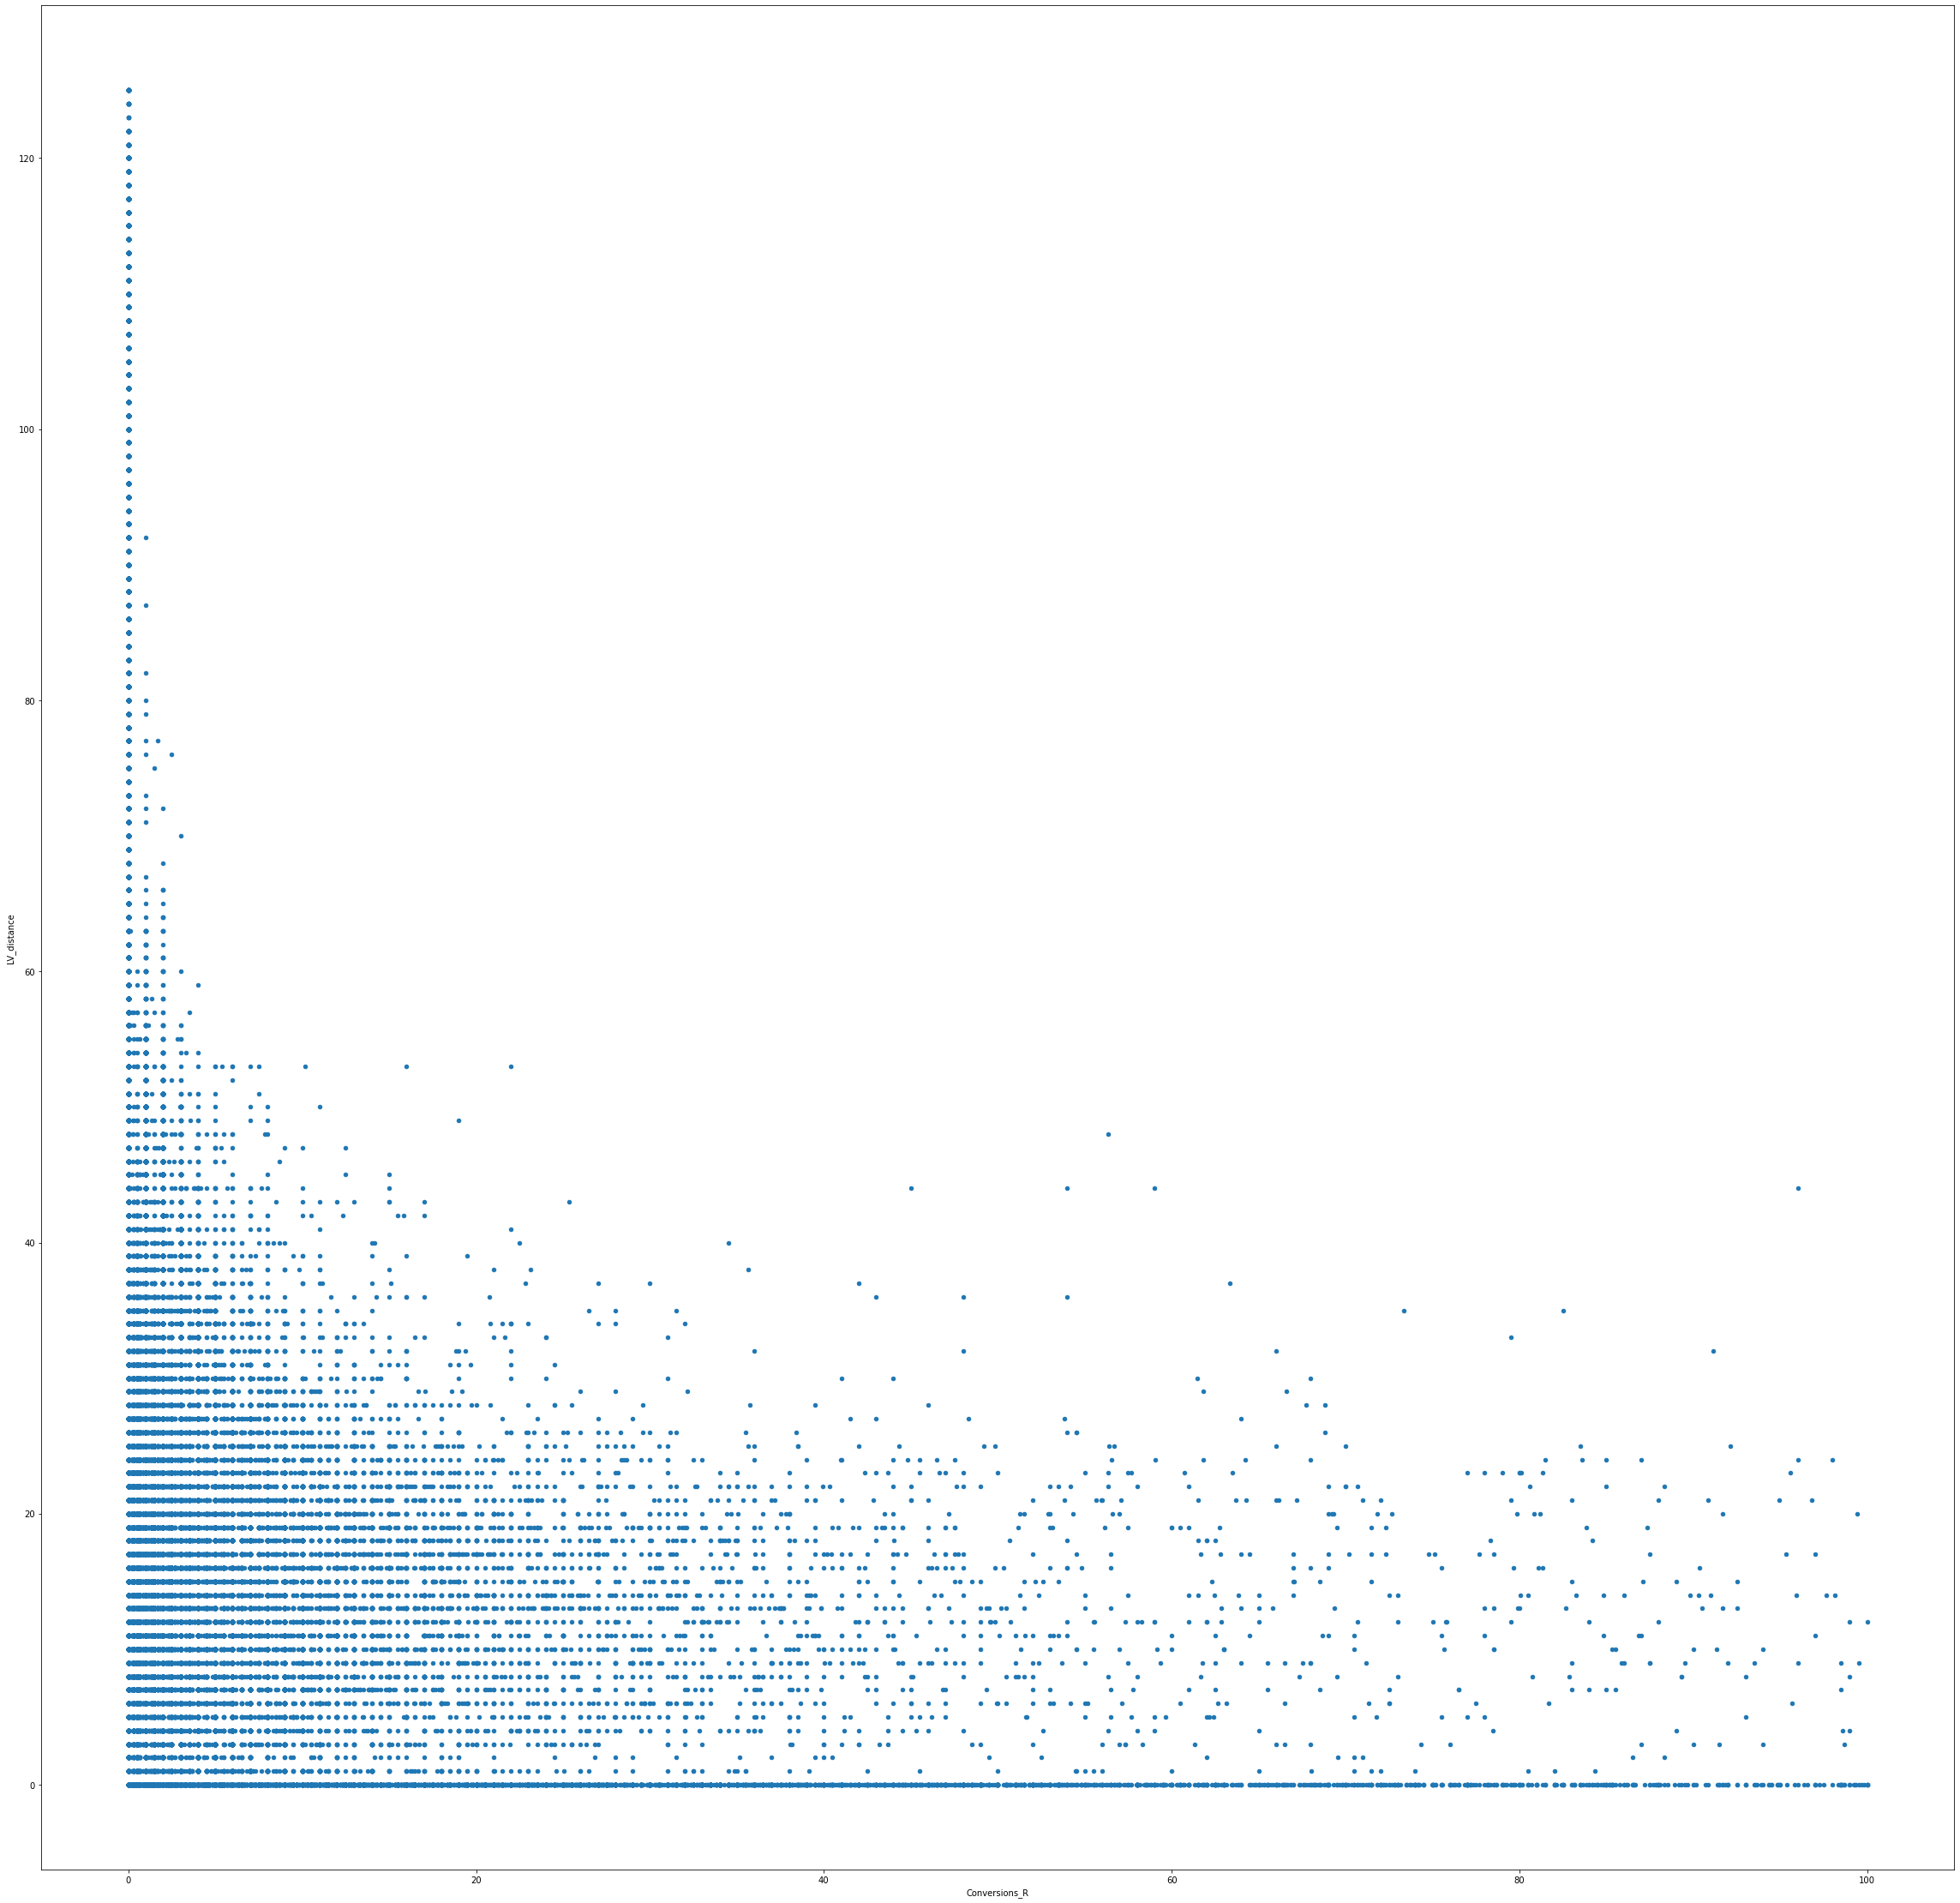

In [130]:
test.plot.scatter(x='Conversions_R',y='LV_distance',colormap='viridis',figsize=(40,40))

<AxesSubplot:xlabel='LV_distance', ylabel='Conversions_R'>

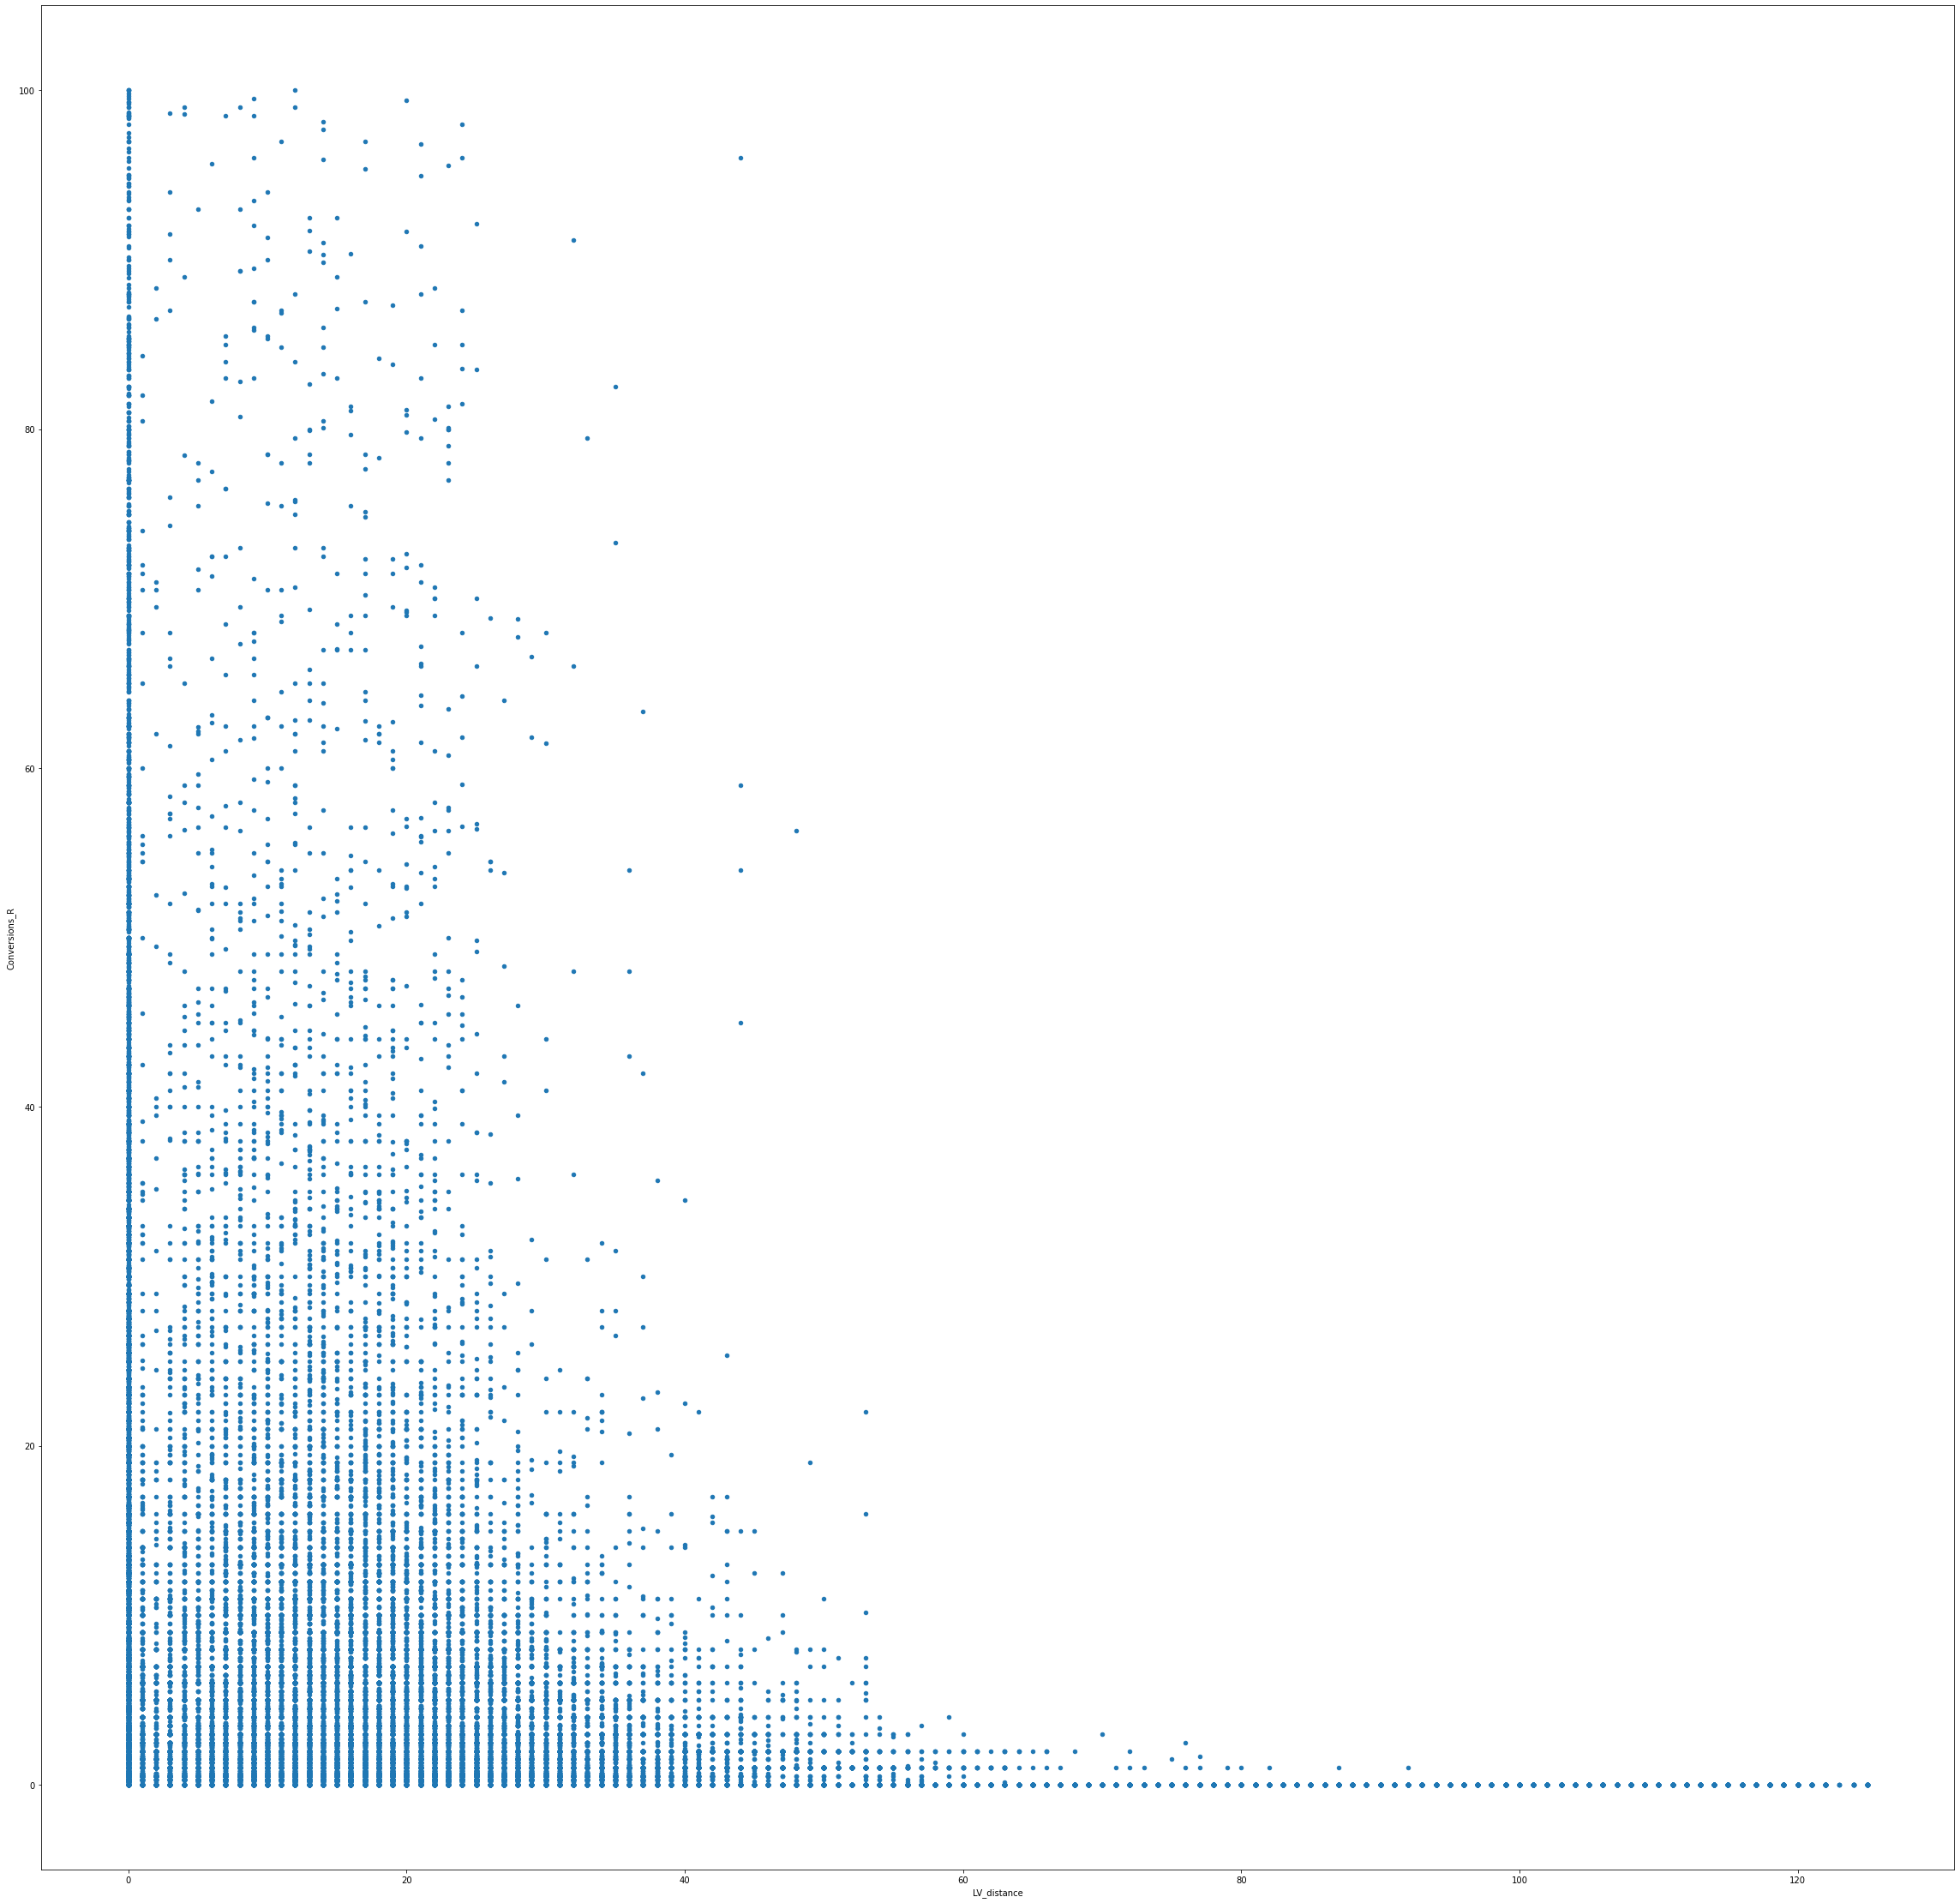

In [307]:
test.plot.scatter(x='LV_distance',y='Conversions_R',colormap='viridis',figsize=(40,40))

## Test1

In [233]:
X = search_df['Search term'].to_numpy()

In [234]:
print(X)

['private health insurance america' 'open enrollment obamacare 2021'
 'free insurance stimulus' ... 'www molina' 'medicare part d illinois'
 'center st dental']


In [235]:
vectorizer = TfidfVectorizer()

In [240]:
testX = vectorizer.fit_transform(X)

In [237]:
# search_df['X_train'] = X_train

In [238]:
# print(X_train)

  (0, 13908)	0.7263784211863822
  (0, 81345)	0.22083081726798973
  (0, 71178)	0.23902625810666375
  (0, 128261)	0.6053714457381164
  (1, 1929)	0.48791755014901333
  (1, 115829)	0.4984271752168931
  (1, 54836)	0.48826869103373477
  (1, 118044)	0.5245002389113821
  (2, 148117)	0.8292394430197102
  (2, 62038)	0.5167270214896875
  (2, 81345)	0.2129674421191105
  (3, 9489)	0.6485008152914901
  (3, 158621)	0.6688519005444081
  (3, 61314)	0.3009964472039152
  (3, 81345)	0.20367858619655277
  (4, 31443)	0.4256744339168585
  (4, 134221)	0.8585481777215863
  (4, 71178)	0.2858256511240823
  (5, 64489)	0.5407457331923969
  (5, 125428)	0.3547584879122726
  (5, 80336)	0.5439196570846981
  (5, 1929)	0.4446002486170077
  (5, 81345)	0.20155880203127066
  (5, 71178)	0.21816631769980777
  (6, 152468)	0.47207930077030247
  :	:
  (13446989, 142773)	0.6290782298203837
  (13446989, 83143)	0.4415318027623618
  (13446989, 82880)	0.283071529507957
  (13446989, 81345)	0.15304920487867518
  (13446989, 71178)	0.16

In [242]:
# Search_t = vectorizer.transform(testX)


In [243]:
print(Search_t)

  (0, 128261)	0.6053714457381163
  (0, 81345)	0.2208308172679897
  (0, 71178)	0.2390262581066637
  (0, 13908)	0.7263784211863821
  (1, 118044)	0.5245002389113821
  (1, 115829)	0.4984271752168931
  (1, 54836)	0.48826869103373477
  (1, 1929)	0.48791755014901333
  (2, 148117)	0.8292394430197102
  (2, 81345)	0.2129674421191105
  (2, 62038)	0.5167270214896875
  (3, 158621)	0.6688519005444081
  (3, 81345)	0.20367858619655277
  (3, 61314)	0.3009964472039152
  (3, 9489)	0.6485008152914901
  (4, 134221)	0.8585481777215863
  (4, 71178)	0.2858256511240823
  (4, 31443)	0.4256744339168585
  (5, 125428)	0.35475848791227255
  (5, 81345)	0.20155880203127063
  (5, 80336)	0.5439196570846981
  (5, 71178)	0.21816631769980774
  (5, 64489)	0.5407457331923968
  (5, 1929)	0.44460024861700764
  (6, 157343)	0.6321123700233512
  :	:
  (13446989, 142773)	0.6290782298203837
  (13446989, 83143)	0.4415318027623618
  (13446989, 82880)	0.283071529507957
  (13446989, 81345)	0.15304920487867518
  (13446989, 71178)	0.165

In [244]:
model = pickle.load(open('search_classifier_prod.pkl','rb'))

/var/folders/5q/5s79sfds3w7_qbfv5xrwbj6r0000gn/T/ipykernel_93209/1673016744.py:1: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  model = pickle.load(open('search_classifier_prod.pkl','rb'))


In [246]:
# y_pred = model.predict(Search_t)

In [ ]:
search_df['Type'] = y_pred

In [155]:
# print(X,y_pred)

['private health insurance america' 'open enrollment obamacare 2021'
 'free insurance stimulus' ... 'www molina' 'medicare part d illinois'
 'center st dental'] [2 1 2 ... 1 1 1]


In [248]:
search_df[['Search term','Type']].head(30)

,Search term,Type
0,private health insurance america,2
1,open enrollment obamacare 2021,1
2,free insurance stimulus,2
3,insurance for unemployed adults,2
4,retirement health care,1
5,individual health insurance plans georgia 2021,2
6,types of short term insurance,1
7,oasis healthcare services,1
8,north carolina health insurance marketplace,2
9,www my uhcvision com,1


In [247]:
search_df.Type.value_counts()

1    10356055
2     3090941
Name: Type, dtype: int64

<AxesSubplot:xlabel='Conversions_R', ylabel='LV_distance'>

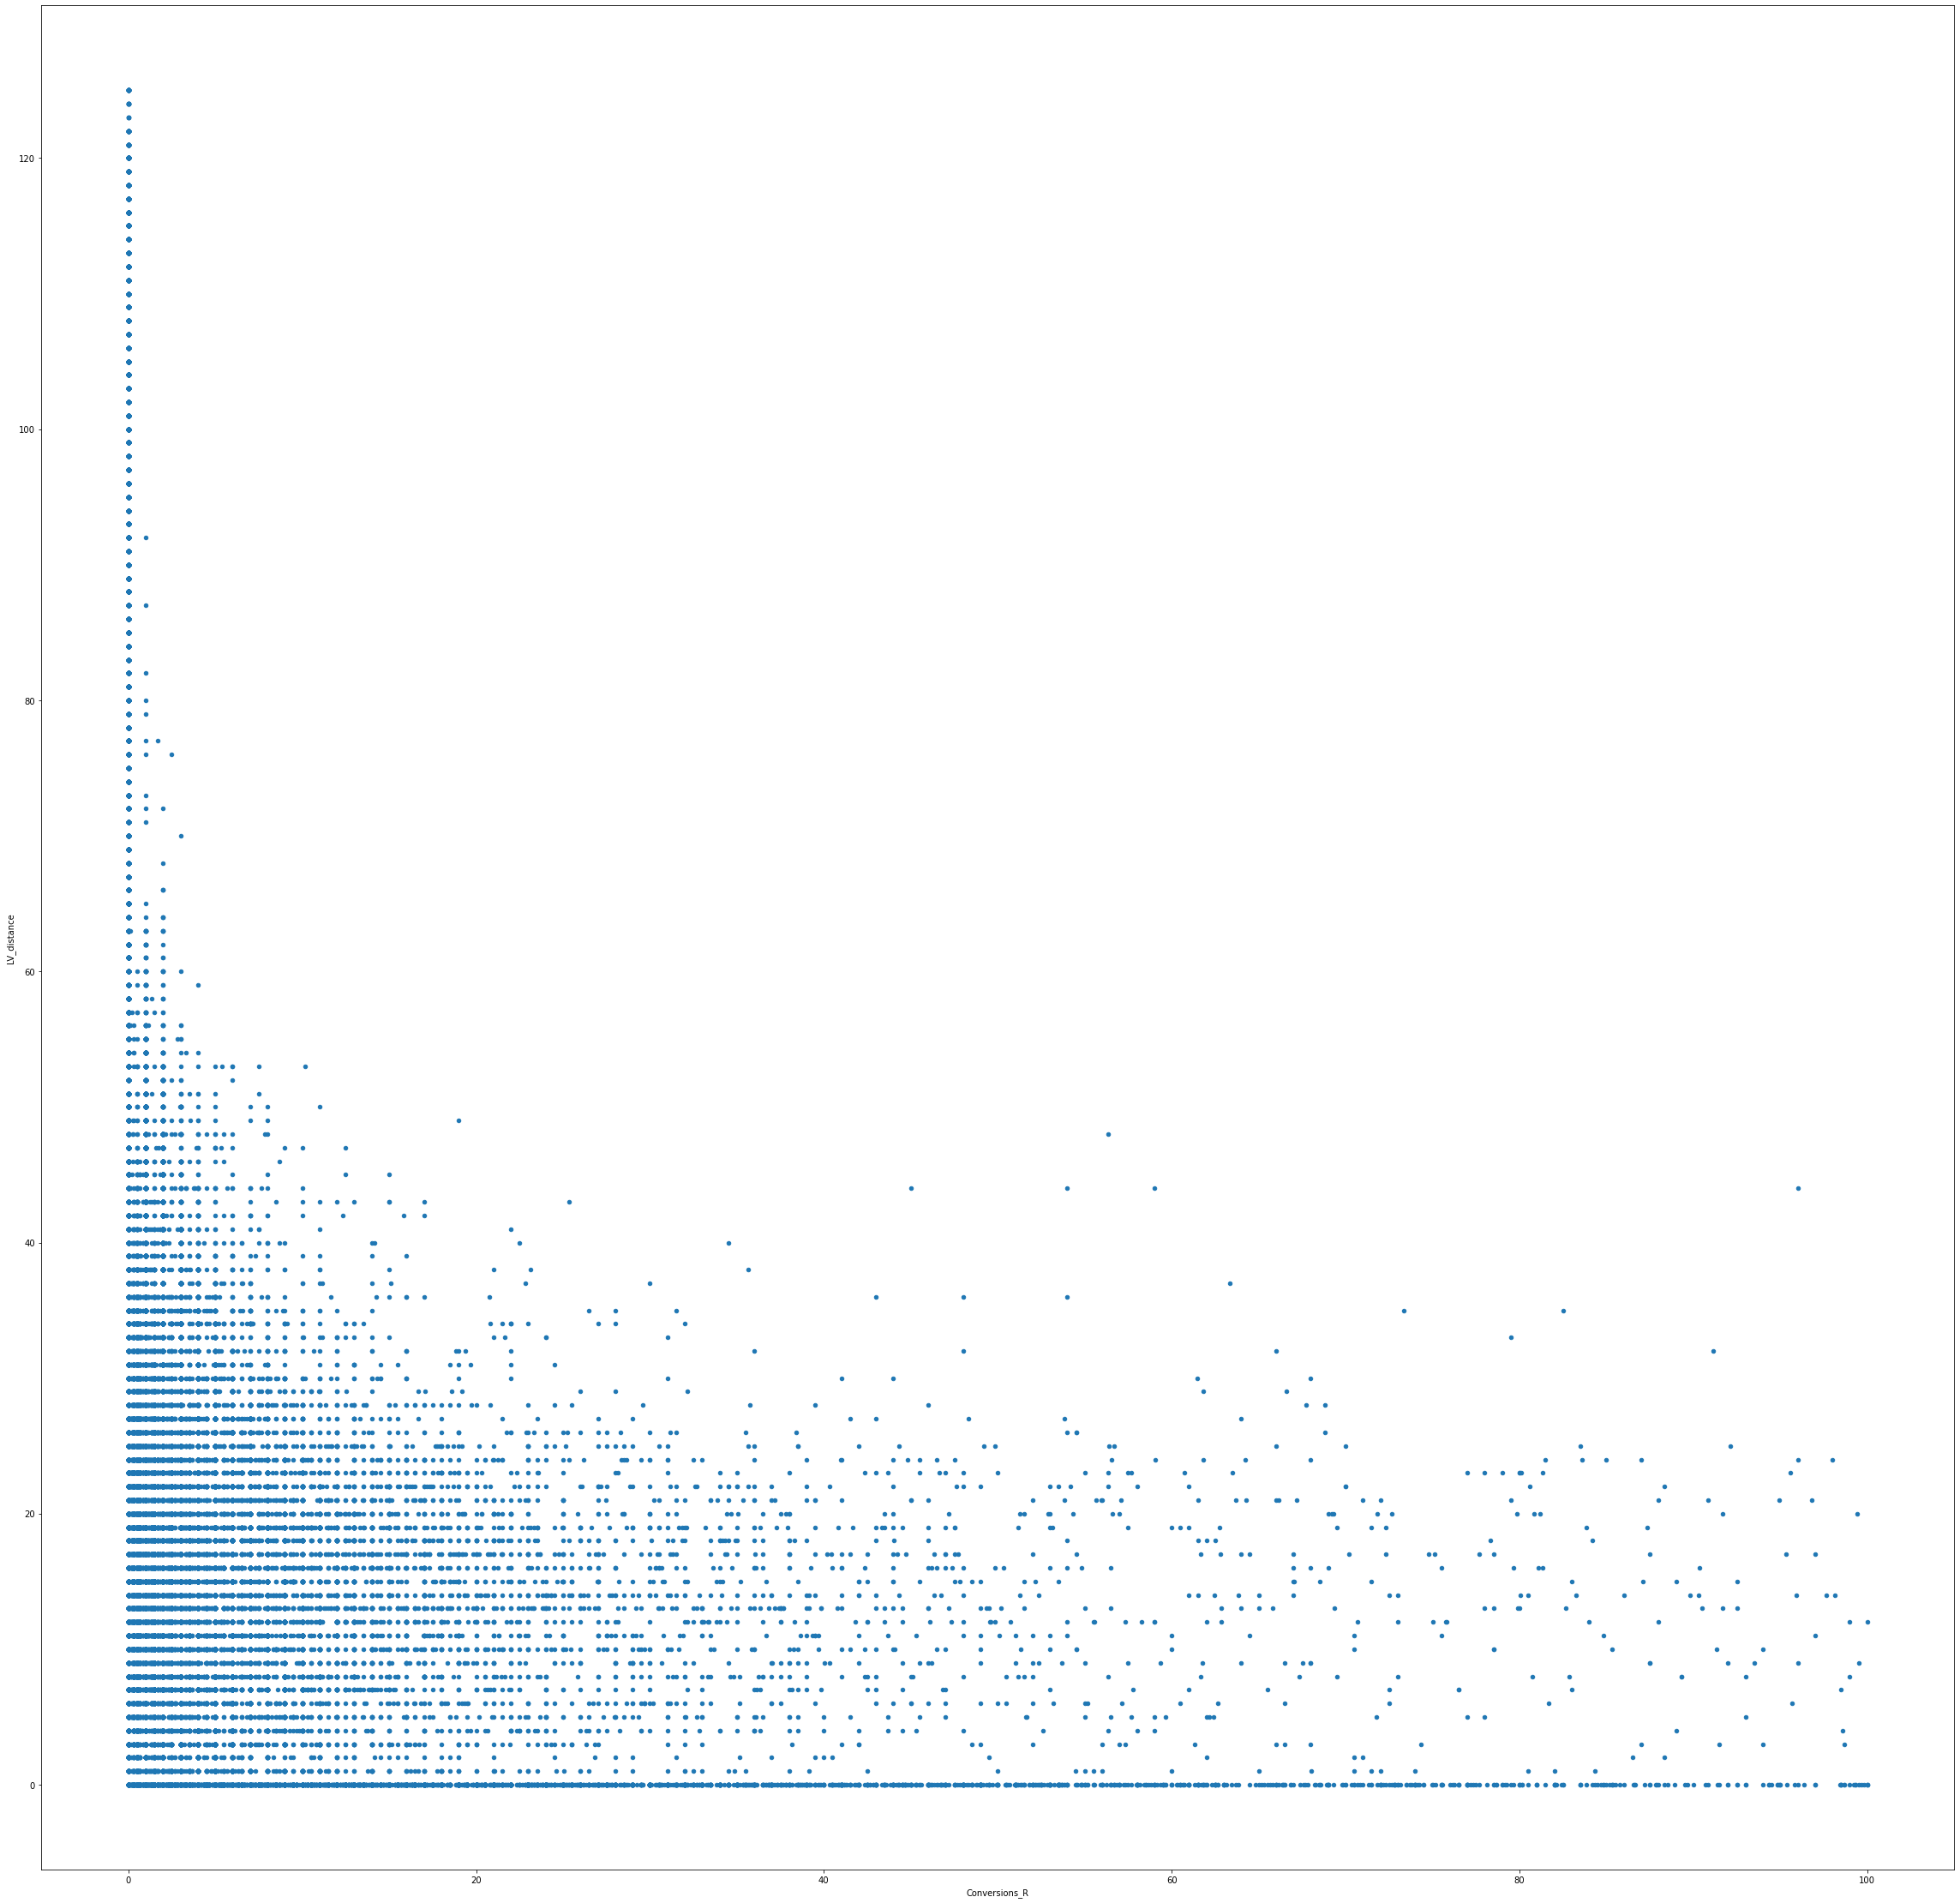

In [183]:
test.loc[test['Type']==1].plot.scatter(x='Conversions_R',y='LV_distance',colormap='viridis',figsize=(40,40))

<AxesSubplot:xlabel='Conversions_R', ylabel='LV_distance'>

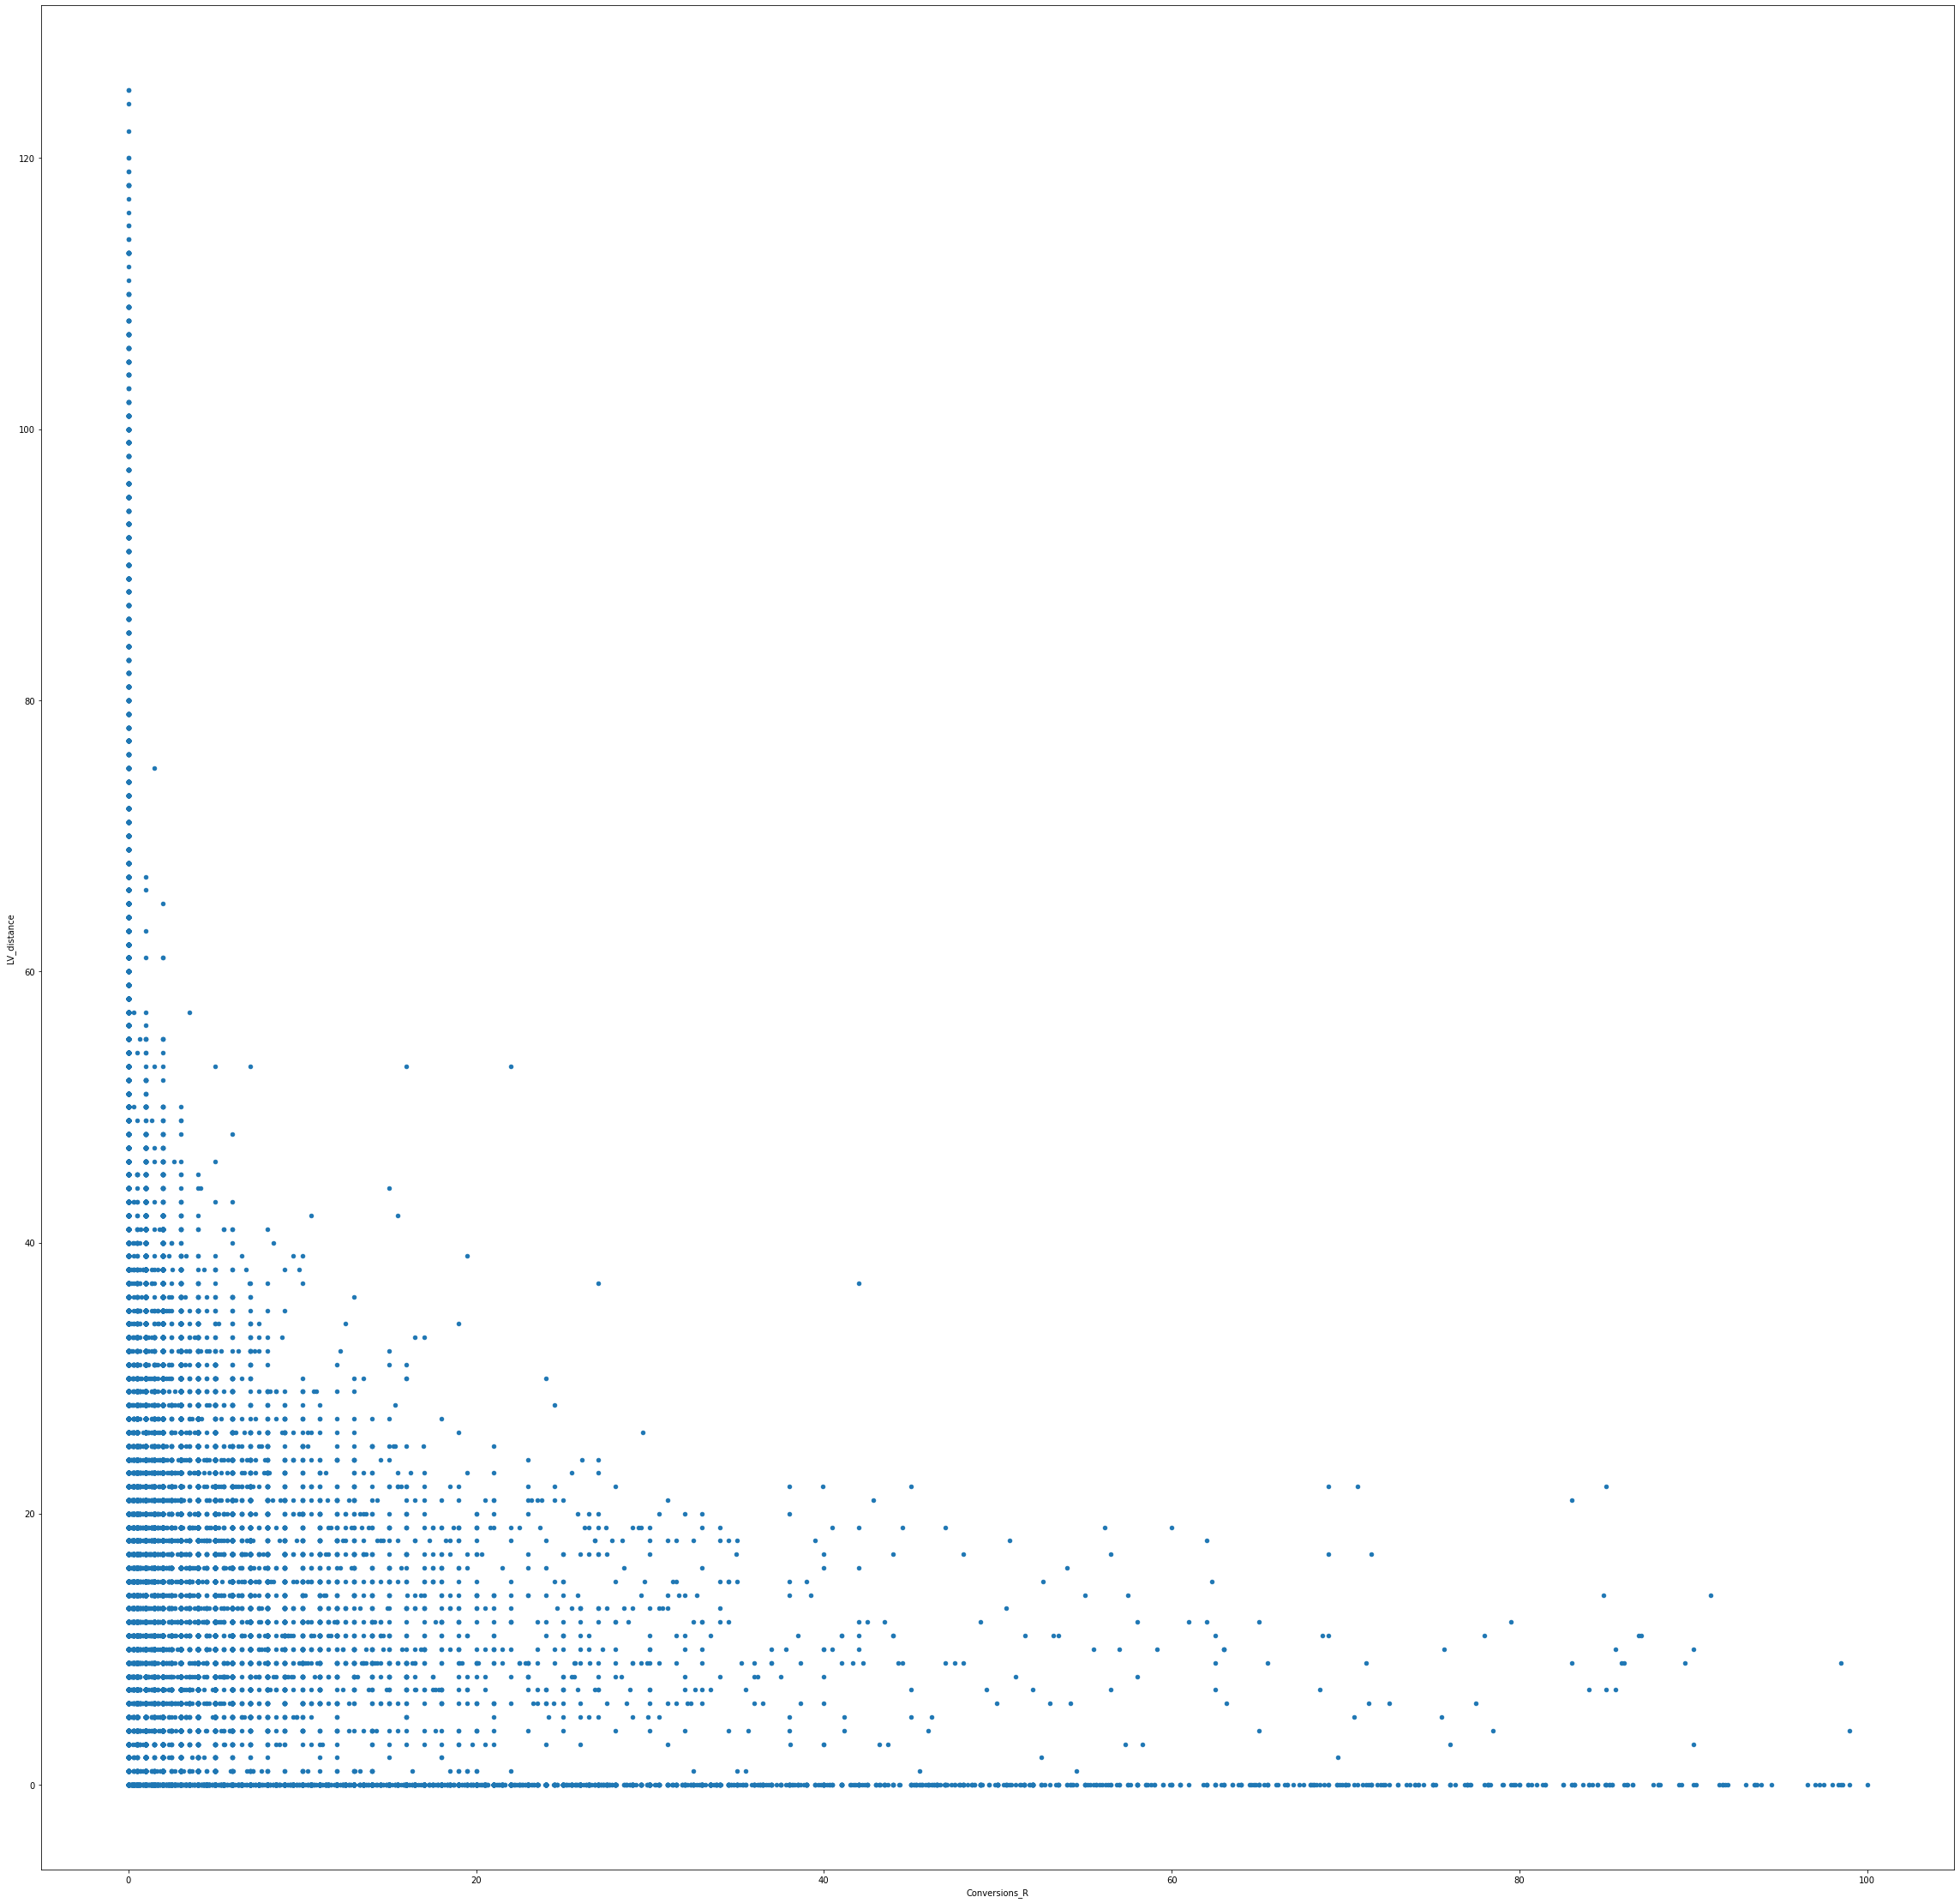

In [184]:
test.loc[test['Type']==2].plot.scatter(x='Conversions_R',y='LV_distance',colormap='viridis',figsize=(40,40))

In [296]:
test.loc[test['Type']==2].count()

Account name          3090671
Customer ID           3090671
Search term           3090671
Currency code         3090671
Search keyword        3090671
Keyword ID            3090671
Campaign ID           3090671
Clicks                3090671
Impr.                 3090671
CTR                   3090671
Avg. CPC              3090671
Cost                  3090671
Impr. (Abs. Top) %    3090671
Impr. (Top) %         3090671
Conversions           3090671
View-through conv.    3090671
Cost / conv.          3090671
Conv. value           3090671
Conv. value / cost    3090671
Conv. rate            3090671
LV_distance           3090671
Conversions_R         3090671
Type                  3090671
query_vec             3090671
keyword_vec           3090671
simscore              3090671
dtype: int64

In [297]:
test.loc[test['Type']==1].count()

Account name          10355543
Customer ID           10355543
Search term           10355543
Currency code         10355543
Search keyword        10355543
Keyword ID            10355543
Campaign ID           10355543
Clicks                10355543
Impr.                 10355543
CTR                   10355543
Avg. CPC              10355543
Cost                  10355543
Impr. (Abs. Top) %    10355543
Impr. (Top) %         10355543
Conversions           10355543
View-through conv.    10355543
Cost / conv.          10355543
Conv. value           10355543
Conv. value / cost    10355543
Conv. rate            10355543
LV_distance           10355543
Conversions_R         10355543
Type                  10355543
query_vec             10355543
keyword_vec           10355543
simscore              10355543
dtype: int64

In [252]:
test.loc[test['Type']==2].Conversions_R.sum()

231449.97000000015

Conversion rate of product

In [301]:
test.loc[test['Type']==2].Conversions_R.sum()/test.loc[test['Type']==2].Conversions_R.count()

0.07488664112097346

In [303]:
# 231449.97000000015/3090671

In [253]:
test.loc[test['Type']==1].Conversions_R.sum()

564512.7599999998

Conversion rate of informational

In [302]:
test.loc[test['Type']==1].Conversions_R.sum()/test.loc[test['Type']==1].Conversions_R.count()

0.05451310085815875

In [304]:
# 564512.7599999998/10355543

In [254]:
test.Conversions_R.sum()

795962.729999999

In [305]:
test.loc[test['Type']==2].Conversions_R.sum()/test.Conversions_R.sum()

0.2907799087527634

In [306]:
test.loc[test['Type']==1].Conversions_R.sum()/test.Conversions_R.sum()

0.7092200912472377

In [ ]:
# test.loc[test['Type']==1].Conversions.sum()

In [ ]:
# test.loc[test['Type']==2].LV_distance.sum()

In [ ]:
# test.loc[test['Type']==1].LV_distance.sum()

## Test 2

In [170]:
# from searchintent.transformer import SearchQueryTransformer

ModuleNotFoundError: No module named 'searchintent'

In [163]:
with open('special_dict_full.pkl', 'rb') as f:
    special_tokens = pickle.load(f)


In [164]:
with open('vocab_dict_full.pkl', 'rb') as f:
    dictionary = pickle.load(f)

In [165]:
with open('manual_spell_check_full.pkl', 'rb') as f:
    manual_dict = pickle.load(f)

In [172]:
with open('symspell_obj_full.pkl', 'rb') as f:
    symspell = pickle.load(f)

ModuleNotFoundError: No module named 'searchintent'

In [171]:
import re
import numpy as np

class SearchQueryTransformer():
    def __init__(self,
                 special_dict: dict,
                 vocab: dict,
                 manual_spell_list: dict,
                 symspell: SymSpell):
        self.special_lists = list(special_dict.values())
        self.special_tokens = list(special_dict.keys())
        self.vocab = vocab
        self.manual_spell_list = manual_spell_list
        self.symspell = symspell

    def tokenize_with_list(self,
                           entry: str,
                           term_list: list,
                           special_token: str):
        tokenized_entry = ""
        for word in entry.split():
            if word in term_list:
                tokenized_entry += special_token + " "
                continue

            # Validate lenght because a lot of terms are acronyms
            # and they get mistakenly corrected to another term
            if len(word) > 3:
                corrections = self.symspell.correction(word=word)
                if len(corrections) > 0 and corrections[0]['word'] in term_list:
                    tokenized_entry += special_token + " "
                    continue
            
            tokenized_entry += word + " "
        
        # Remove dupe special tokens
        tokenized_entry = re.sub('(' + special_token + ' ?)+', special_token + ' ', tokenized_entry)
        return tokenized_entry.strip()

    def tokenize_remaining_specials(self,
                                    entry: str,
                                    unknown_token: str,
                                    number_token: str):
        tokenized_entry = ""
        for word in entry.split():
            if word in self.vocab or word in self.special_tokens:
                tokenized_entry += word + " "
                continue
            
            # Validate lenght because a lot of terms are acronyms
            # and they get mistakenly corrected to another term
            if len(word) > 3:
                if re.match(r"\$?[0-9]+", word) is not None:
                    tokenized_entry += number_token + " "
                else:
                    corrections = self.symspell.correction(word=word)
                    if len(corrections) > 0:
                        tokenized_entry += corrections[0]['word'] + " "
                    else:
                        tokenized_entry += unknown_token + " "
            
            elif re.match(r"\$?[0-9]+", word) is not None:
                tokenized_entry += number_token + " "
            else:
                tokenized_entry += unknown_token + " "
    
        tokenized_entry = re.sub('(' + number_token + ' ?)+', number_token + ' ', tokenized_entry)
        tokenized_entry = re.sub('(' + unknown_token + ' ?)+', unknown_token + ' ', tokenized_entry)
        return tokenized_entry.strip()

    def split_terms(self,
                    query,
                    full_vocab):
        words_by_length = list(set(full_vocab))
        words_by_length.sort(key=len, reverse=True) 
        fixed_string = ""
                        
        for word in query.split():
            if word in full_vocab:
                fixed_string += word + " "
                continue
            if word in self.manual_spell_list:
                fixed_string += self.manual_spell_list[word] + " "
                continue
            
            for vocab_word in words_by_length:
                if len(vocab_word) < 4 or len(word) < 4:
                    fixed_string += word + " "
                    word = ""
                    break
                if word.find(vocab_word) >= 0:
                    fixed_string += vocab_word + " "
                    word = word.replace(vocab_word, "", 1)
            
            if len(word) > 0:
                fixed_string += word + " "

        return fixed_string.strip()

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self,
                  query,
                  **transform_params):
        query = query.lower()
        full_vocab = list(self.vocab.keys())
        for temp_list in self.special_lists:
            full_vocab += temp_list
        query = self.split_terms(query, full_vocab)
        
        
        for idx, special_token in enumerate(self.special_tokens):
            query = self.tokenize_with_list(query, self.special_lists[idx], special_token)
        
        query = self.tokenize_remaining_specials(query, '<UNK>', '<NUM>')
        return np.array([query])


NameError: name 'SymSpell' is not defined

In [169]:
transformer = SearchQueryTransformer(special_tokens,
                                        dictionary,
                                        manual_dict,
                                        symspell)

NameError: name 'SearchQueryTransformer' is not defined

## Test 3

In [256]:
# import math
# import re
# from collections import Counter


In [264]:

# WORD = re.compile(r"\w+")


# def get_cosine(vec1, vec2):
#     intersection = set(vec1.keys()) & set(vec2.keys())
#     numerator = sum([vec1[x] * vec2[x] for x in intersection])

#     sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
#     sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
#     denominator = math.sqrt(sum1) * math.sqrt(sum2)

#     if not denominator:
#         return 0.0
#     else:
#         return float(numerator) / denominator


# def text_to_vector(text):
#     words = WORD.findall(text)
#     print(words)
#     return Counter(words)



In [285]:

# text1 = search_df['Search term'][0]
# text2 =  search_df['Search term'][8]

# vector1 = text_to_vector(text1)
# vector2 = text_to_vector(text2)

# cosine = get_cosine(vector1, vector2)

# print("Cosine:", cosine)

In [286]:

# text1 = search_df['Search term'][0]
# # text2 =  search_df['Search term'][8]

# vector1 = text_to_vector(search_df['Search term'])
# vector2 = text_to_vector(search_df['Search keyword'])

# cosine = get_cosine(vector1, vector2)

# print("Cosine:", cosine)

## Test 4

In [282]:
import math
import re
from collections import Counter
import pandas as pd



In [283]:
WORD = re.compile(r"\w+")


def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator


def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)



In [284]:
# df=pd.read_csv('/content/drive/article.csv')
search_df['query_vec']=search_df['Search term'].apply(lambda x: text_to_vector(x)) 
search_df['keyword_vec']=search_df['Search keyword'].apply(lambda x: text_to_vector(x)) 
search_df['simscore']=search_df.apply(lambda x: get_cosine(x['query_vec'],x['keyword_vec']),axis=1)

In [287]:
search_df[['query_vec','keyword_vec','simscore']]

,query_vec,keyword_vec,simscore
0,"{'private': 1, 'health': 1, 'insurance': 1, 'a...","{'Affordable': 1, 'Health': 1, 'Insurance': 1}",0.000000
1,"{'open': 1, 'enrollment': 1, 'obamacare': 1, '...","{'Affordable': 1, 'Health': 1, 'Insurance': 1}",0.000000
2,"{'free': 1, 'insurance': 1, 'stimulus': 1}","{'Affordable': 1, 'Health': 1, 'Insurance': 1}",0.000000
3,"{'insurance': 1, 'for': 1, 'unemployed': 1, 'a...","{'Affordable': 1, 'Health': 1, 'Insurance': 1}",0.000000
4,"{'retirement': 1, 'health': 1, 'care': 1}","{'Affordable': 1, 'Health': 1, 'Insurance': 1}",0.000000
...,...,...,...
13446991,"{'dental': 1, 'racine': 1, 'wi': 1}",{'dental': 1},0.577350
13446992,"{'affordable': 1, 'care': 1, 'act': 1, 'insura...","{'aca': 1, 'arizona': 1}",0.316228
13446993,"{'www': 1, 'molina': 1}","{'www': 1, 'molina': 1, 'com': 1}",0.816497
13446994,"{'medicare': 1, 'part': 1, 'd': 1, 'illinois': 1}","{'part': 1, 'd': 1}",0.707107


In [290]:
test[['query_vec','keyword_vec','simscore','Conversions_R','LV_distance']]

,query_vec,keyword_vec,simscore,Conversions_R,LV_distance
0,"{'private': 1, 'health': 1, 'insurance': 1, 'a...","{'Affordable': 1, 'Health': 1, 'Insurance': 1}",0.000000,0.0,18
1,"{'open': 1, 'enrollment': 1, 'obamacare': 1, '...","{'Affordable': 1, 'Health': 1, 'Insurance': 1}",0.000000,0.0,28
2,"{'free': 1, 'insurance': 1, 'stimulus': 1}","{'Affordable': 1, 'Health': 1, 'Insurance': 1}",0.000000,0.0,23
3,"{'insurance': 1, 'for': 1, 'unemployed': 1, 'a...","{'Affordable': 1, 'Health': 1, 'Insurance': 1}",0.000000,0.0,27
4,"{'retirement': 1, 'health': 1, 'care': 1}","{'Affordable': 1, 'Health': 1, 'Insurance': 1}",0.000000,0.0,17
...,...,...,...,...,...
13446991,"{'dental': 1, 'racine': 1, 'wi': 1}",{'dental': 1},0.577350,0.0,10
13446992,"{'affordable': 1, 'care': 1, 'act': 1, 'insura...","{'aca': 1, 'arizona': 1}",0.316228,0.0,26
13446993,"{'www': 1, 'molina': 1}","{'www': 1, 'molina': 1, 'com': 1}",0.816497,0.0,4
13446994,"{'medicare': 1, 'part': 1, 'd': 1, 'illinois': 1}","{'part': 1, 'd': 1}",0.707107,0.0,18


<AxesSubplot:xlabel='Conversions_R', ylabel='simscore'>

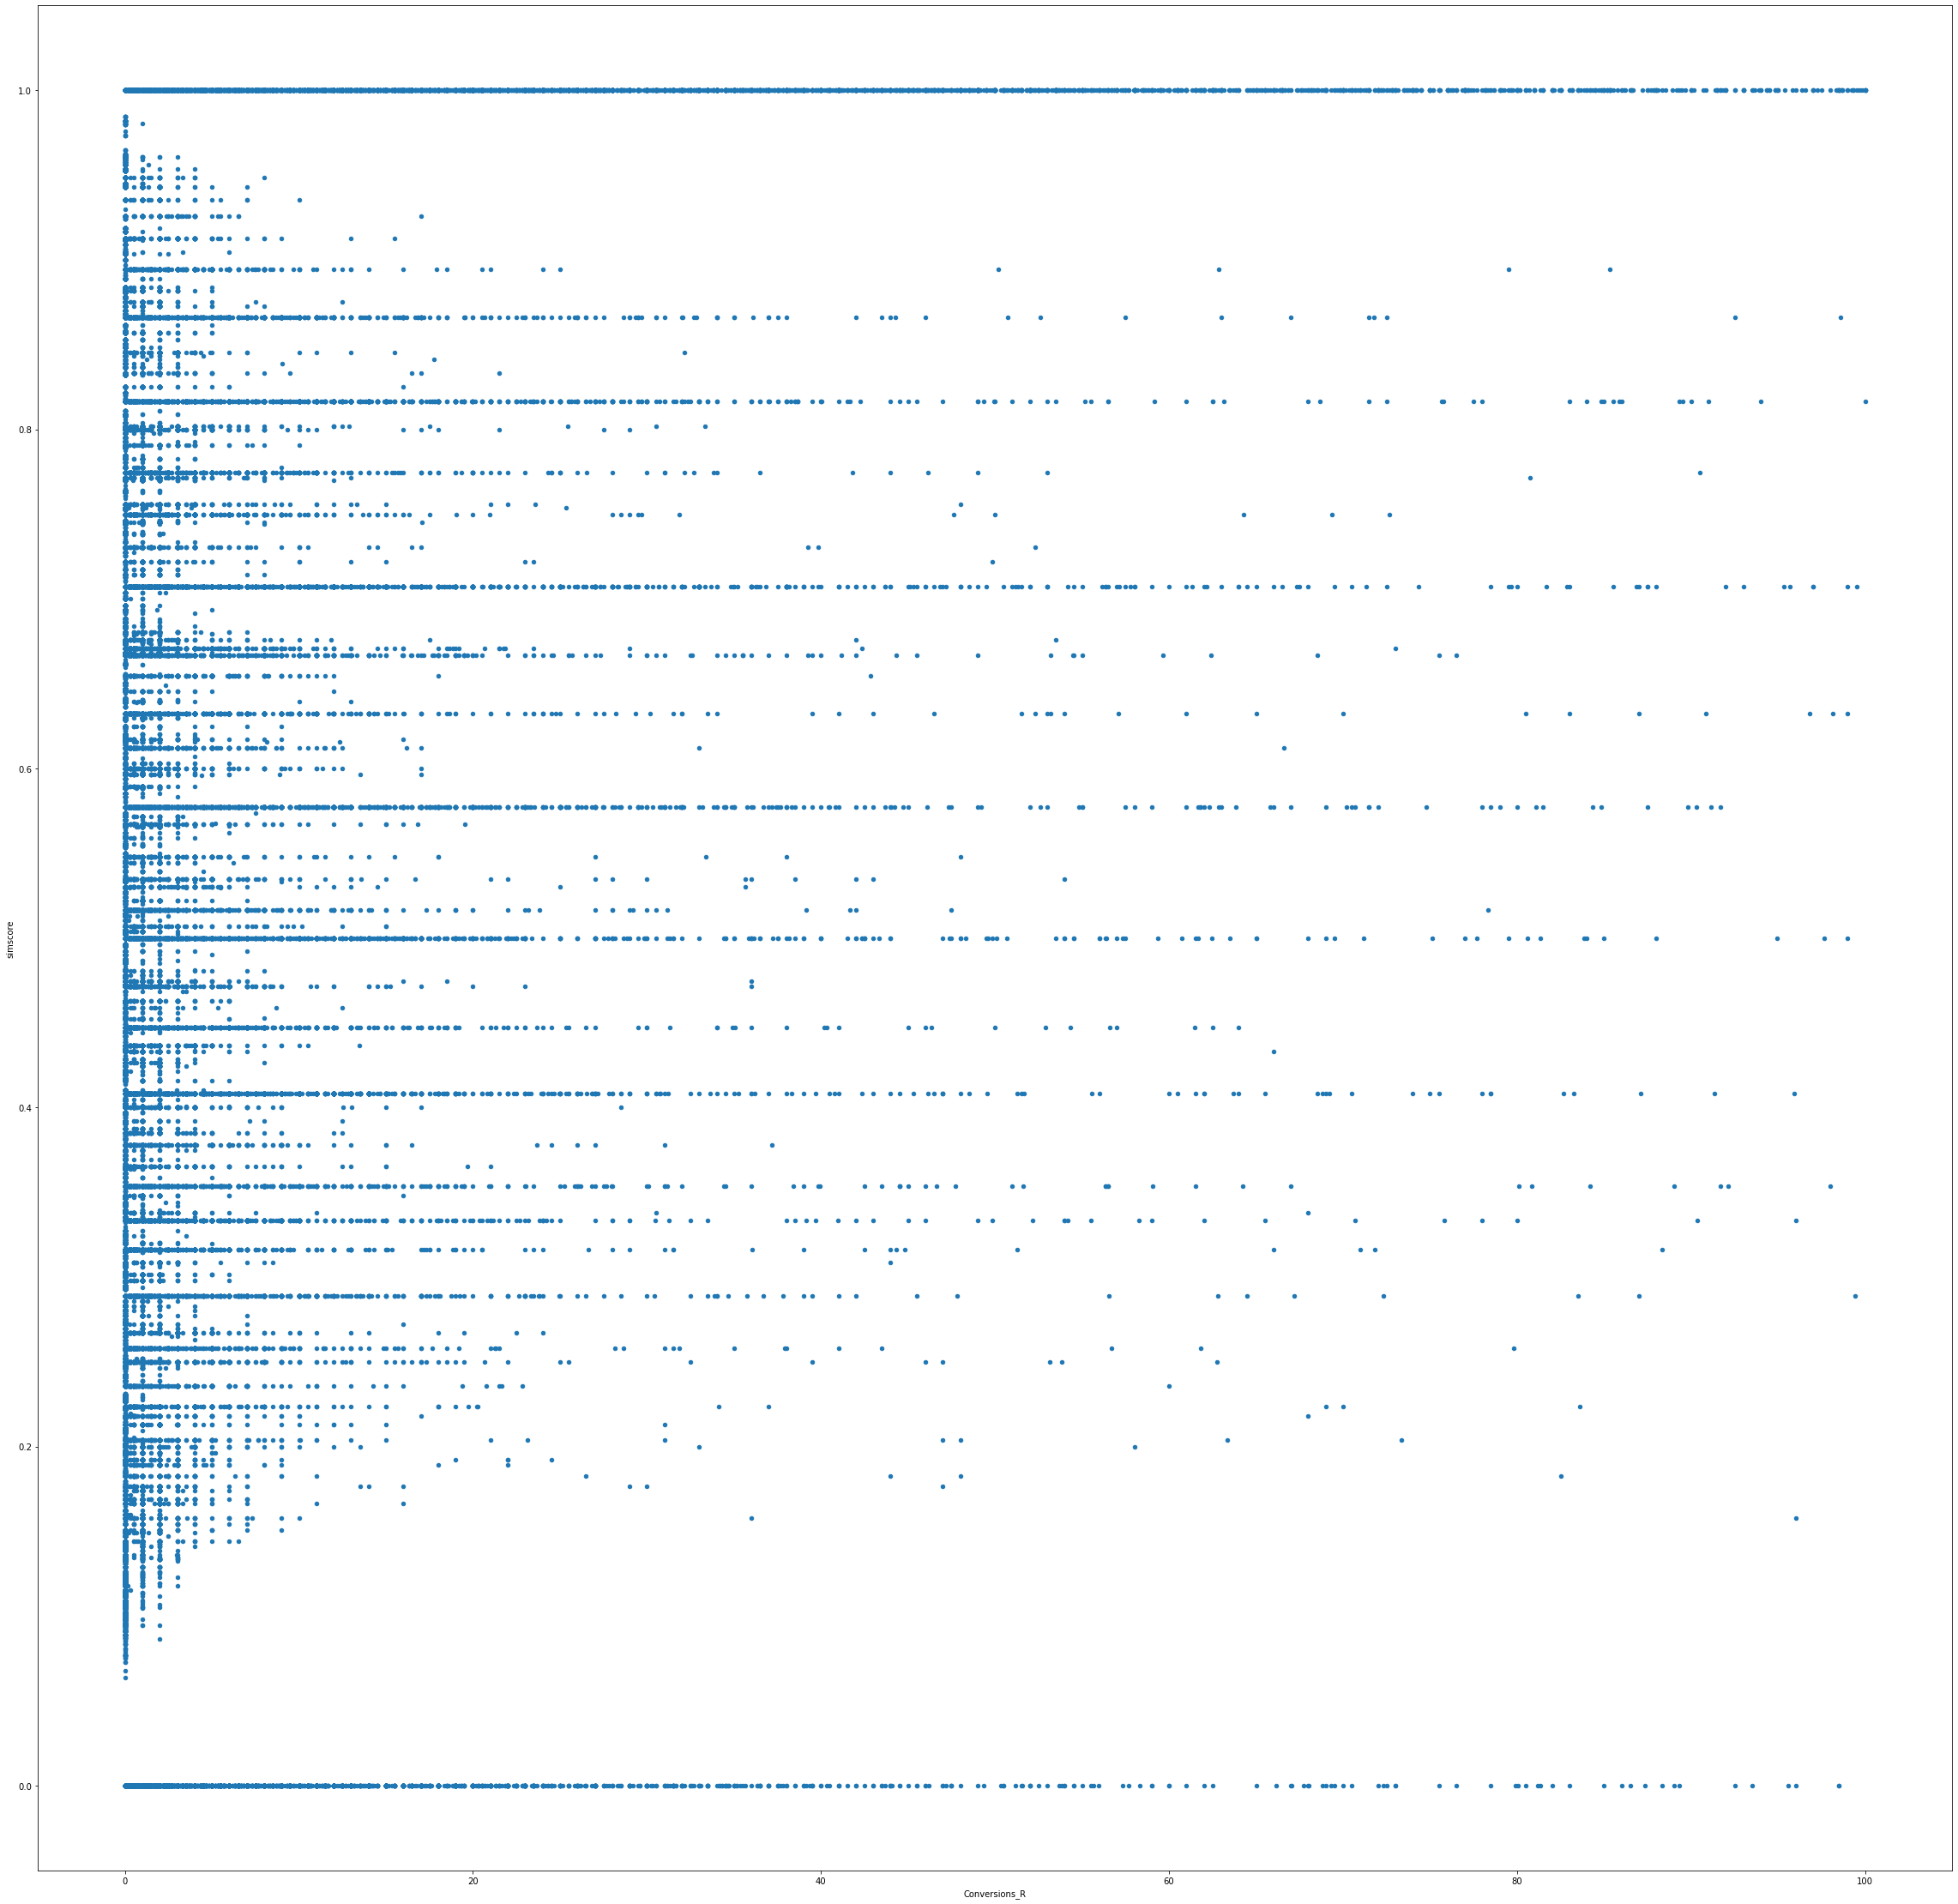

In [291]:
test.plot.scatter(x='Conversions_R',y='simscore',colormap='viridis',figsize=(40,40))

<AxesSubplot:xlabel='Conversions_R', ylabel='simscore'>

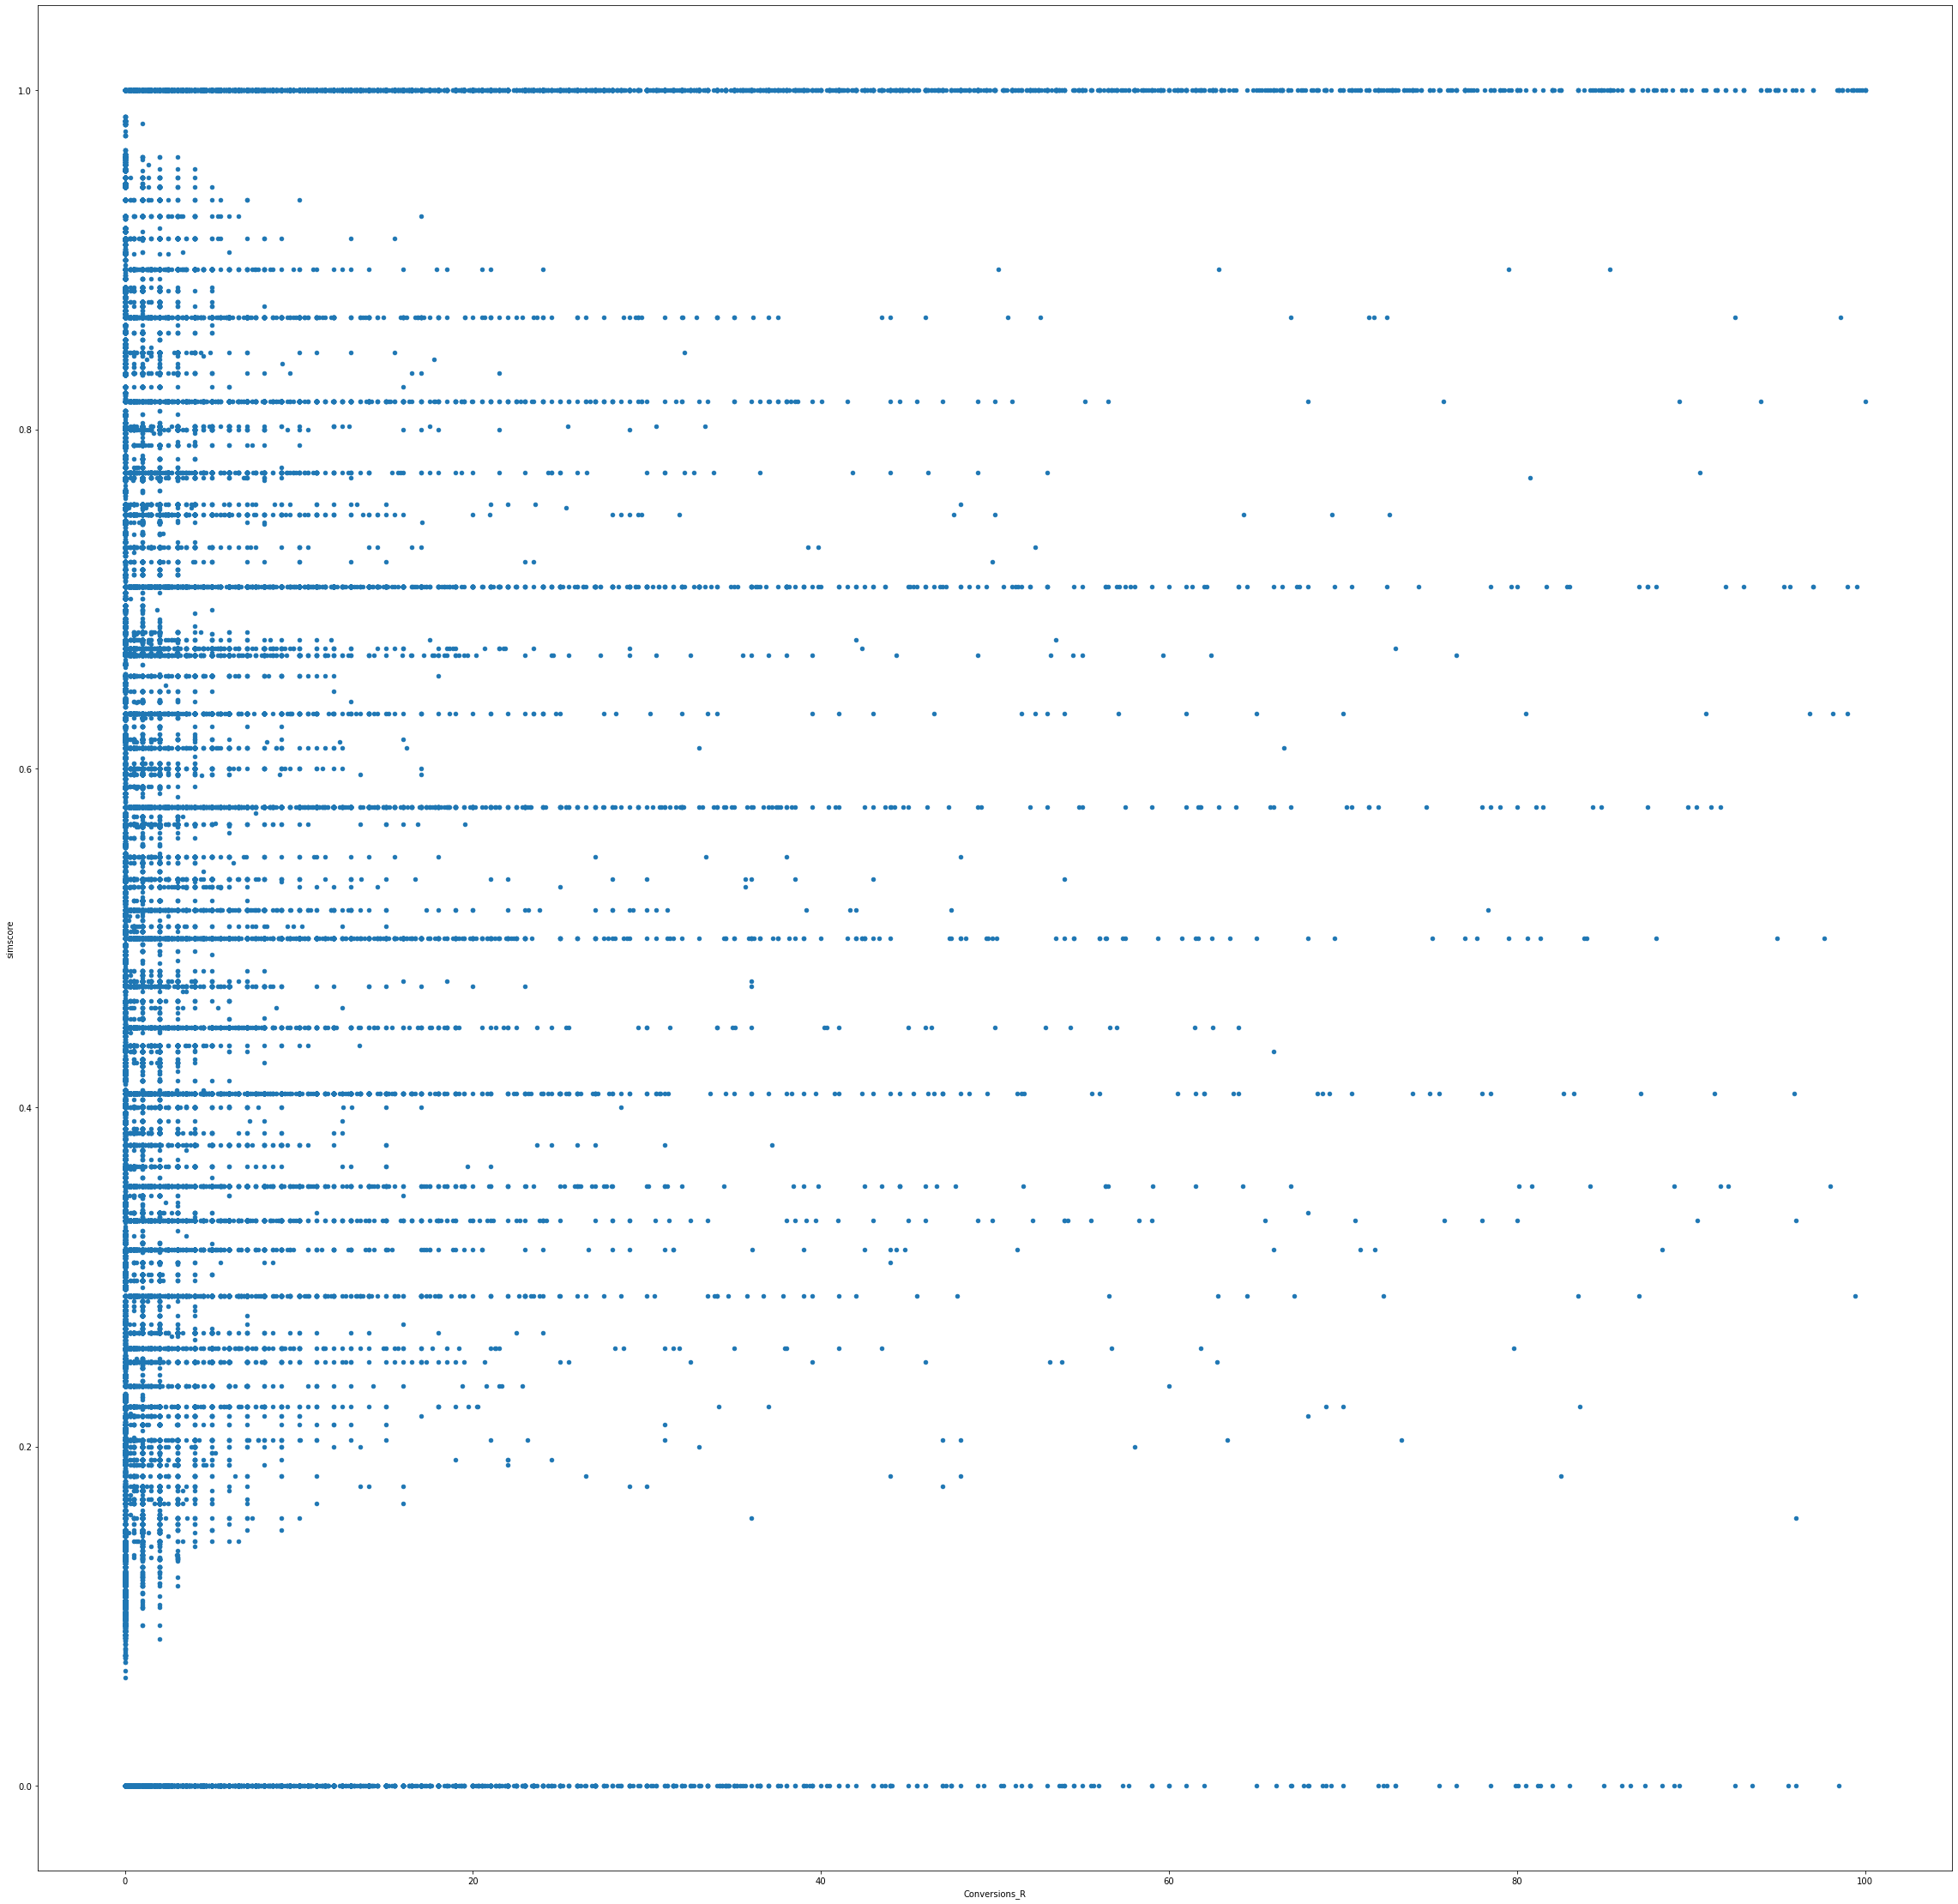

In [294]:
test.loc[test['Type']==1].plot.scatter(x='Conversions_R',y='simscore',colormap='viridis',figsize=(40,40))

<AxesSubplot:xlabel='Conversions_R', ylabel='simscore'>

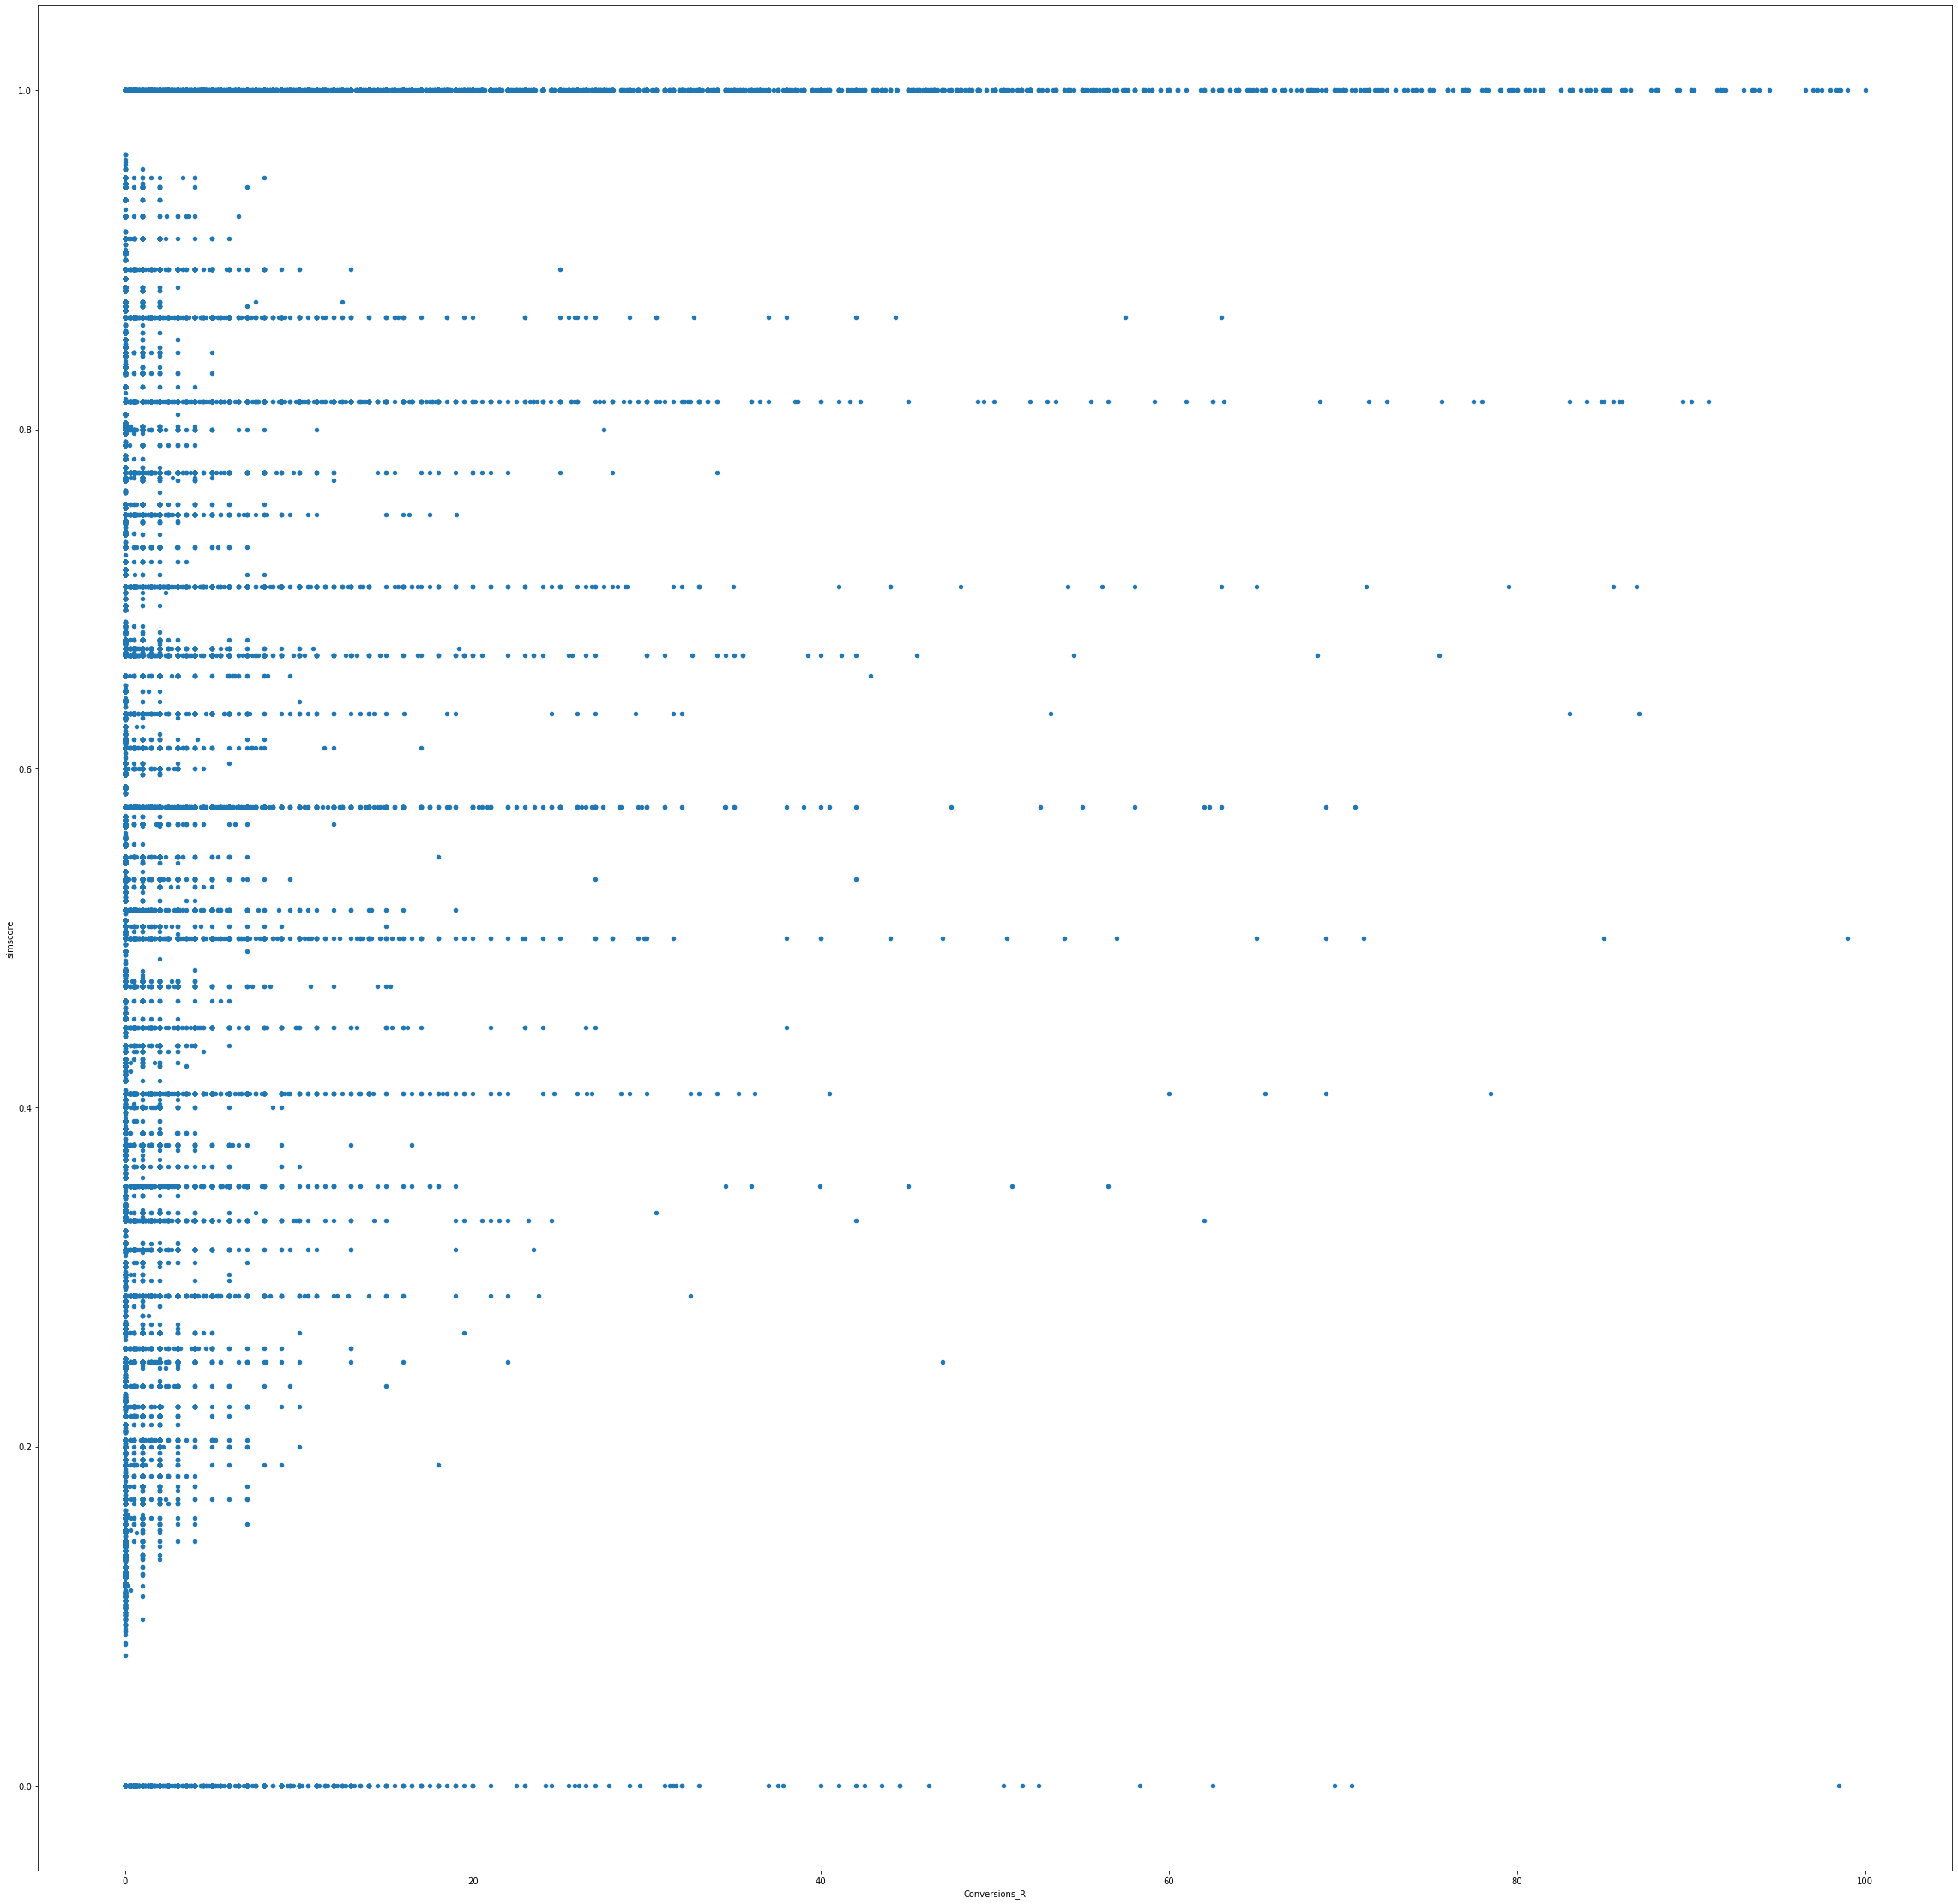

In [295]:
test.loc[test['Type']==2].plot.scatter(x='Conversions_R',y='simscore',colormap='viridis',figsize=(40,40))